<a href="https://colab.research.google.com/github/emanueleiacca/ADM-HW4/blob/main/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 4 - Movie Recommendation System**

### #Group21
Camilla Labbate - camillalabbate02@icloud.com

Emanuele Iaccarino - emanueleiaccarino.ei@gmail.com

Andrej Sterjev - andrej.sterjev@gmail.com

## 1. **Recommendation System with LSH**

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
#movielens_20m_dataset_path = kagglehub.dataset_download('grouplens/movielens-20m-dataset')
print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from functions import * #import all the function we made in the functions.py file

In [7]:
"""
movielens_20m_dataset_path = kagglehub.dataset_download('grouplens/movielens-20m-dataset')

dataset_directory = '/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1'

for dirname, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        print(f"File trovato: {filename}")
"""

'\nmovielens_20m_dataset_path = kagglehub.dataset_download(\'grouplens/movielens-20m-dataset\')\n\ndataset_directory = \'/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1\'\n\nfor dirname, _, filenames in os.walk(dataset_directory):\n    for filename in filenames:\n        print(f"File trovato: {filename}")\n'

In [8]:
"""
ratings_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/rating.csv")
links_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/link.csv")
genome_tags_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/genome_tags.csv")
genome_scores_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/genome_scores.csv")
tags_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/tag.csv")
movies_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/movie.csv")
"""

'\nratings_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/rating.csv")\nlinks_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/link.csv")\ngenome_tags_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/genome_tags.csv")\ngenome_scores_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/genome_scores.csv")\ntags_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/tag.csv")\nmovies_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/movie.csv")\n'

### 1.1 Data Preparation

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
rating_df_pd = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
links_df_pd = pd.read_csv("/kaggle/input/movielens-20m-dataset/link.csv")
genome_tags_df_pd = pd.read_csv("/kaggle/input/movielens-20m-dataset/genome_tags.csv")
genome_scores_df_pd = pd.read_csv("/kaggle/input/movielens-20m-dataset/genome_scores.csv")
tags_df_pd = pd.read_csv("/kaggle/input/movielens-20m-dataset/tag.csv")
movies_df_pd = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")

In [11]:
print("\nInfo about dataset 'movies':")
print(movies_df_pd.info())

print("\nInfo about dataset 'ratings':")
print(rating_df_pd.info())


print("\nInfo about dataset 'tag':")
print(tags_df_pd.info())

print("\nInfo about dataset 'genome_tags':")
print(genome_tags_df_pd.info())


print("\nInfo about dataset  'genome_scores':")
print(genome_scores_df_pd.info())

print("\nInfo about dataset 'link':")
print(links_df_pd.info())

display(movies_df_pd.head())
display(rating_df_pd.head())
display(tags_df_pd.head())
display(genome_tags_df_pd.head())
display(genome_scores_df_pd.head())
display(links_df_pd.head())


Info about dataset 'movies':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
None

Info about dataset 'ratings':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB
None

Info about dataset 'tag':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40

userId  movieId            tag            timestamp
0      18     4141    Mark Waters  2009-04-24 18:19:40
1      65      208      dark hero  2013-05-10 01:41:18
2      65      353      dark hero  2013-05-10 01:41:19
3      65      521  noir thriller  2013-05-10 01:39:43
4      65      592      dark hero  2013-05-10 01:41:18

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [12]:
print(rating_df_pd.isnull().sum())
print(movies_df_pd.isnull().sum())
print(tags_df_pd.isnull().sum())
print(links_df_pd.isnull().sum())
print(genome_scores_df_pd.isnull().sum())
print(genome_tags_df_pd.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
movieId      0
imdbId       0
tmdbId     252
dtype: int64
movieId      0
tagId        0
relevance    0
dtype: int64
tagId    0
tag      0
dtype: int64


In [13]:
rating_df=rating_df_pd.drop_duplicates()
movies_df=movies_df_pd.drop_duplicates()
tags_df=tags_df_pd.drop_duplicates()
links_df=links_df_pd.drop_duplicates()
genome_scores_df=genome_scores_df_pd.drop_duplicates()
genome_tags_df=genome_tags_df_pd.drop_duplicates()


In [14]:
movies_df_pd['genres'] = movies_df_pd['genres'].str.replace('|', ' ')
tfidf = TfidfVectorizer(stop_words='english')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


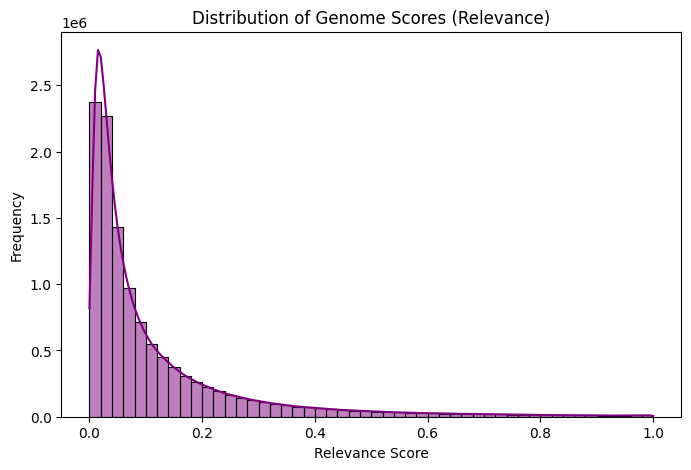

In [15]:
plt.figure(figsize=(8, 5))
# Use the pandas DataFrame directly for plotting
sns.histplot(genome_scores_df_pd['relevance'], bins=50, kde=True, color='purple')
plt.title('Distribution of Genome Scores (Relevance)')
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.show()

There are noticeable peaks around ratings like 3.0, 4.0, and 5.0, suggesting that many users tend to give these scores.
Ratings below 2.0 are much less frequent.
The dataset might have a tendency towards higher ratings, indicating a positive skew (more ratings closer to 4 or 5).

This distribution suggests that users tend to rate movies positively, with most ratings clustering around 3 to 5. This behavior is common in user-generated rating datasets, where extreme negative ratings are less frequent.

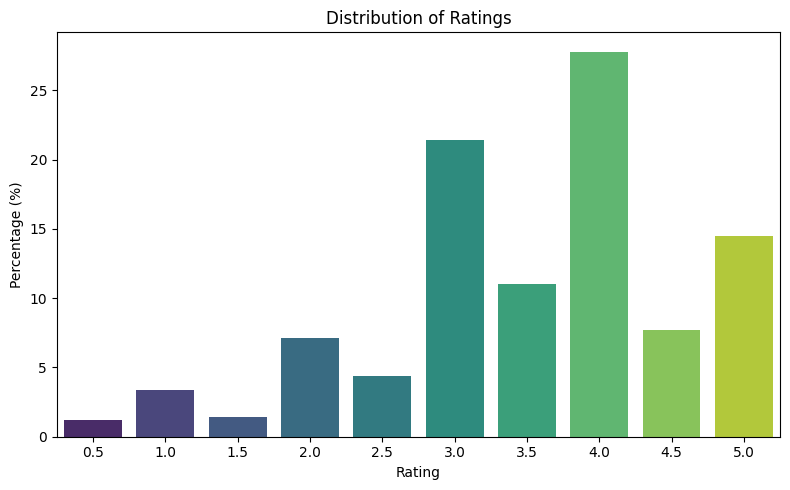

In [16]:
rating_counts = rating_df_pd['rating'].value_counts().sort_index()
percentage_ratings = (rating_counts / rating_counts.sum()) * 100

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=rating_counts.index,
    y=percentage_ratings,
    palette='viridis'
)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()



This bar chart represents the **distribution of ratings** provided by users. The x-axis shows the rating values (likely on a scale from 0.5 to 5.0), and the y-axis represents the **percentage of users** who gave each rating.

1. **Dominant Ratings**:
   - The most frequent rating is **4.0**, making up the highest percentage (over 25%).
   - Ratings of **3.0** and **5.0** also have a notable percentage, suggesting they are common choices among users.

2. **Low Ratings**:
   - Ratings below 2.0 (e.g., 0.5, 1.0) are less frequent, accounting for a minimal percentage of the distribution.

3. **Trend**:
   - The chart shows a positive skew: as ratings increase toward 4.0, the percentage grows, but it slightly drops for the maximum rating of **5.0**.


   - This distribution suggests that most users tend to rate movies in the mid-to-high range (3.0–4.0), with relatively few users assigning very low or extremely high ratings.

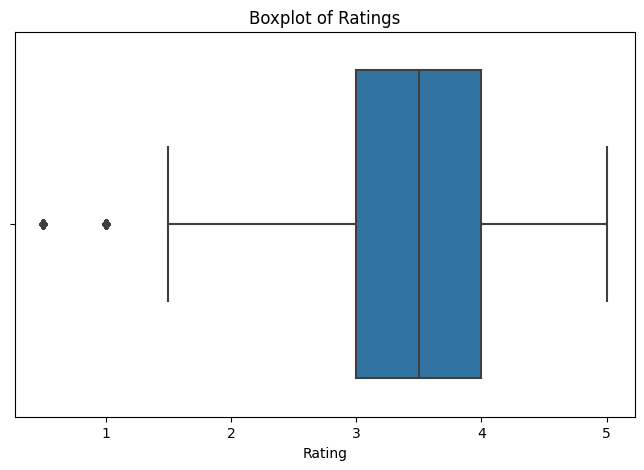

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=rating_df_pd['rating'])
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

The box represents the interquartile range (IQR), which contains the middle 50% of the data (from the first quartile Q1 to the third quartile Q3).
The line inside the box represents the median, indicating the middle value of the dataset.
The whiskers extend to the smallest and largest values within 1.5 times the IQR.
Two outliers are visible as individual points outside the whiskers. These are ratings below the lower whisker threshold.
The data seems to show a concentration of ratings between 3 and 4, with a few low outliers around 1.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


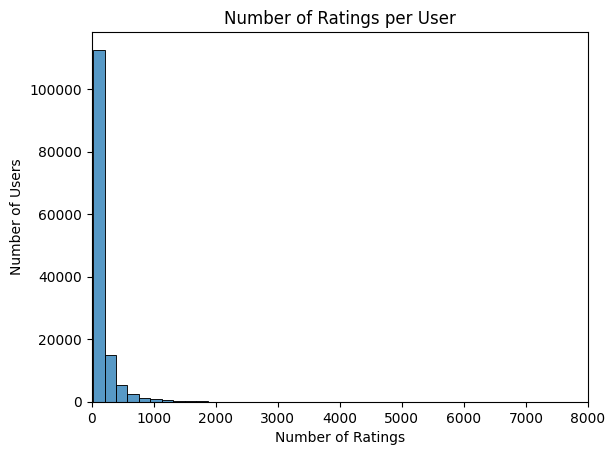

In [18]:
user_ratings_count = rating_df_pd['userId'].value_counts()
sns.histplot(user_ratings_count, bins=50, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.xlim(0, 8000)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


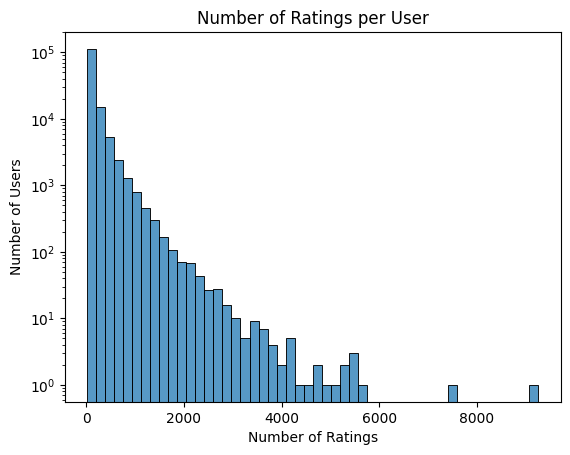

In [19]:
user_ratings_count = rating_df['userId'].value_counts()
sns.histplot(user_ratings_count, bins=50, kde=False)
plt.yscale('log')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


- **X-Axis**: "Number of Ratings" — Represents the number of ratings provided by individual users.
- **Y-Axis**: "Number of Users" — Represents the number of users corresponding to a particular number of ratings.
- The Y-axis is plotted on a **logarithmic scale**, as indicated by the uneven spacing of numbers (e.g., \(10^0, 10^1, 10^2, \dots\)).

- The data shows a **right-skewed distribution**.
- Most users have given very few ratings, as shown by the tall bar on the left-hand side of the histogram.
- A small number of users have provided significantly more ratings, as indicated by the sparse bars extending towards higher numbers of ratings (up to around 9000).
- The frequency of users decreases rapidly as the number of ratings increases.

This suggests that the majority of users are less active, while a small subset of users are highly active in providing ratings.

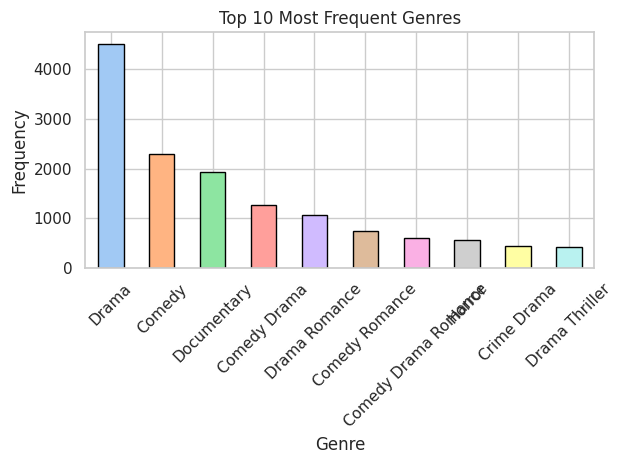

In [20]:
movies_df_pd['genres'] = movies_df_pd['genres'].dropna().astype(str).str.split('|')

# Flatten the list of genres
all_genres = [genre for sublist in movies_df_pd['genres'] for genre in sublist]

# Count genre occurrences and get the top 10
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot with a custom Seaborn palette
sns.set(style="whitegrid")
palette = sns.color_palette("pastel", 10)

# Create the bar chart
genre_counts.plot(kind='bar', color=palette, edgecolor='black')

# Add titles and labels
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()  # Adjust layout to avoid cutting off labels
plt.show()

This bar chart represents the **distribution of top 10 frequent genres** watched by users. The x-axis shows the genres, and the y-axis represents the **the frequency** with which they were watched.

- In the chart above, it is possible to observe the 10 most-watched film genres by users on the platform. According to the chart, the most captivating genre is Drama, followed by Comedy and Documentary.
- According to the chart, the most captivating genre is Drama, followed by Comedy and Documentary.

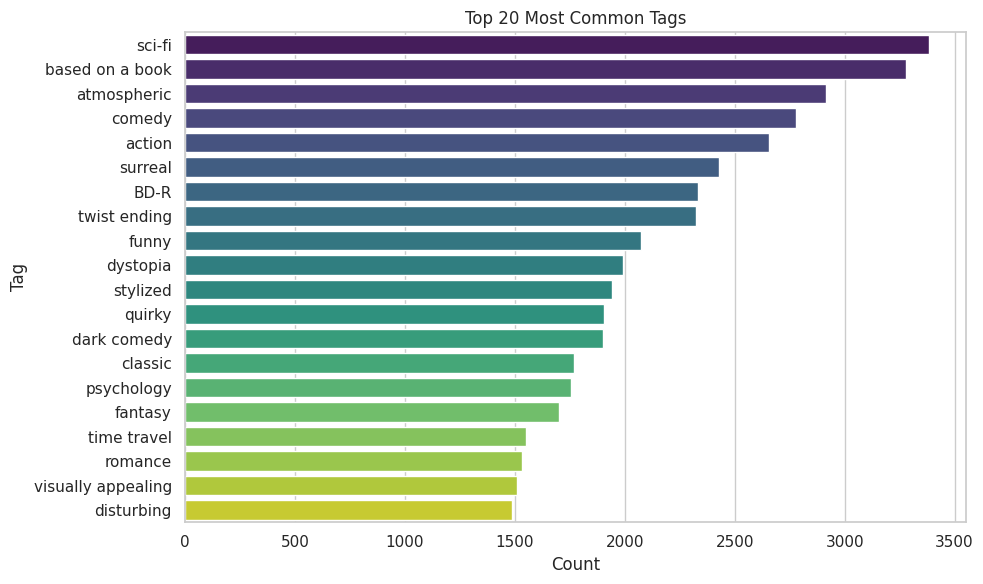

In [21]:
tag_counts = tags_df_pd['tag'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=tag_counts.values,
    y=tag_counts.index,
    palette='viridis'
)
plt.title('Top 20 Most Common Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()


The graph displays the **Top 20 Most Common Tags** associated with movies, ranked by their frequency of appearance .

- The horizontal bars represent the count of occurrences for each tag, with longer bars indicating higher frequency.
- The y-axis lists the movie tags.
- The x-axis represents the count of times each tag was used, ranging from 0 to approximately 3500.

1. **"sci-fi"** is the most frequently used tag, with nearly 3500 occurrences.
2. Tags such as **"based on a book"**, **"atmospheric"**, and **"comedy"** follow closely, indicating their popularity or prevalence in the dataset.
3. The least common tags in this top 20 list, such as **"visually appealing"** and **"disturbing"**, still have notable counts but less compared to the leading tags.

The color gradient likely helps emphasize the frequency, with darker shades representing higher counts and lighter shades for lower counts.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


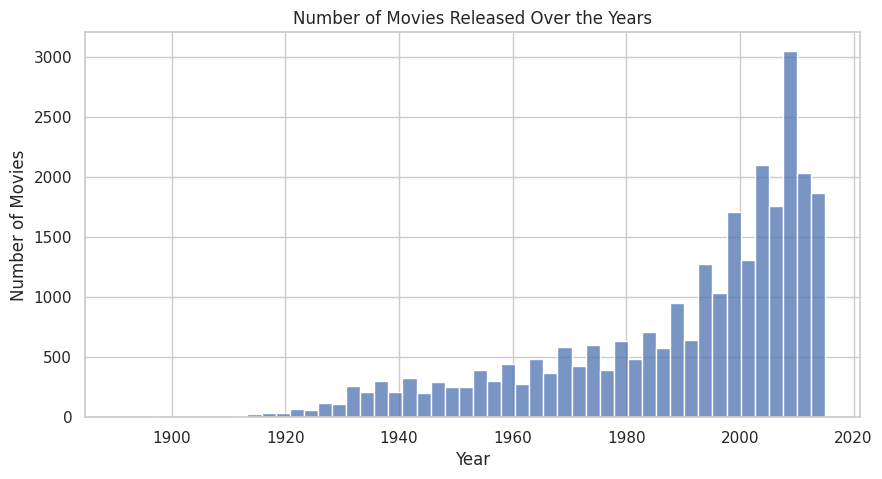

In [22]:
# Extract release year from the title (assuming format: "Movie Title (Year)")
movies_df_pd['year'] = movies_df_pd['title'].str.extract(r'\((\d{4})\)').astype(float)

# Plot movie releases by year
plt.figure(figsize=(10, 5))
sns.histplot(movies_df_pd['year'].dropna(), bins=50, kde=False)
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


- There is a **steady increase** in the number of movies released over time, particularly after 1960.
- The rate of movie releases accelerates significantly after 1980, with a sharp rise leading up to the early 2000s.
- The highest number of movies released is observed around the early 2000s, peaking just before 2020.
- Earlier years, particularly before 1920, show a minimal number of releases, which gradually increase.

This trend indicates growth in the movie industry, particularly in the latter half of the 20th century, likely due to advancements in technology, increased global demand, and accessibility to filmmaking resources.

## 1.2 Minhash Signatures

In [23]:
user_movies = rating_df_pd.groupby('userId')['movieId'].apply(set).to_dict()

In [24]:
min_users_per_movie = 5
movie_counts = rating_df_pd['movieId'].value_counts()
valid_movies = movie_counts[movie_counts >= min_users_per_movie].index
min_movies_per_user = 5
user_counts = rating_df_pd['userId'].value_counts()
valid_users = user_counts[user_counts >= min_movies_per_user].index
filtered_rating_df = rating_df_pd[
    (rating_df_pd['movieId'].isin(valid_movies)) &
    (rating_df_pd['userId'].isin(valid_users))
]


In [25]:
normalized_user_movies = filtered_rating_df.groupby('userId')['movieId'].apply(set).to_dict()


In [34]:
selected_users = list(normalized_user_movies.keys())[:100]
selected_user_movies = {user: normalized_user_movies[user] for user in selected_users}

hash_funcs_2x = create_hash_function_family(
    num_functions=40,
    max_movie_val=int(rating_df_pd['movieId'].max()),
    random_seed=42
)

hash_funcs_quadratic = create_quadratic_hash_family(
    num_functions=40,
    max_val=int(rating_df_pd['movieId'].max()),
    random_seed=42
)

hash_funcs_cubic = create_cubic_hash_family(
    num_functions=40,
    max_val=int(rating_df_pd['movieId'].max()),
    random_seed=42
)


signatures_2x = {
    user: [int(value) for value in signature]
    for user, signature in generate_signatures(selected_users, selected_user_movies, hash_funcs_2x).items()
}

signatures_quadratic = {
    user: [int(value) for value in signature]
    for user, signature in generate_signatures(selected_users, selected_user_movies, hash_funcs_quadratic).items()
}

signatures_cubic = {
    user: [int(value) for value in signature]
    for user, signature in generate_signatures(selected_users, selected_user_movies, hash_funcs_cubic).items()
}


print("Firme MinHash con hash lineare (2x):", list(signatures_2x.items())[:5])
print("Firme MinHash con hash quadratico:", list(signatures_quadratic.items())[:5])
print("Firme MinHash con hash cubico:", list(signatures_cubic.items())[:5])


mse_2x = compute_mse(normalized_user_movies, signatures_2x, selected_users)
mse_quadratic = compute_mse(normalized_user_movies, signatures_quadratic, selected_users)
mse_cubic = compute_mse(normalized_user_movies, signatures_cubic, selected_users)


print("MSE 2x:", mse_2x)
print("MSE x^2:", mse_quadratic)
print("MSE x^3:", mse_cubic)


/tmp/ipykernel_24/1494936738.py:4: RuntimeWarning: overflow encountered in scalar multiply
  return (coeff_a * input_val**3 + coeff_b) % prime_mod


Firme MinHash con hash lineare (2x): [(1, [4289, 5370, 305, 143, 60, 1460, 242, 364, 404, 3021, 5535, 751, 129, 84, 552, 714, 1281, 1192, 85, 25, 652, 1307, 2538, 183, 523, 878, 64, 965, 1400, 1931, 1181, 147, 1194, 3761, 227, 775, 1882, 3410, 20, 408]), (2, [5595, 2642, 91, 19321, 6685, 1460, 3708, 6188, 1418, 6717, 5462, 5401, 1306, 102, 552, 9954, 412, 7005, 4595, 8698, 622, 1307, 7217, 3099, 95, 10050, 10665, 3705, 3376, 501, 475, 5510, 620, 4356, 1140, 1700, 2980, 990, 562, 408]), (3, [242, 1650, 2676, 1680, 1245, 1460, 2240, 1525, 404, 22733, 1250, 1361, 526, 84, 3469, 389, 2516, 1192, 1142, 4266, 637, 1222, 2630, 47, 664, 4363, 64, 37, 545, 1456, 121, 1515, 803, 932, 1140, 1700, 849, 990, 914, 408]), (4, [1491, 2696, 1937, 2155, 2095, 52350, 4271, 2922, 10294, 68989, 11999, 2676, 9734, 9777, 10445, 469, 3920, 3611, 444, 11985, 2072, 10175, 481, 27719, 1426, 12580, 1378, 10405, 6655, 3016, 10154, 963, 17203, 19460, 1140, 4800, 14468, 35345, 555, 2674]), (5, [2947, 2696, 596, 1047

In [35]:
print(f"MSE  2x: {mse_2x:.4f}")
print(f"MSE  x^2: {mse_quadratic:.4f}")
print(f"MSE x^3: {mse_cubic:.4f}")

MSE  2x: 0.0065
MSE  x^2: 0.0062
MSE x^3: 0.0056


In [36]:
#real and estimated similarity
real_similarities = []
estimated_similarities = []

for i, user1 in enumerate(selected_users):
    for user2 in selected_users[i+1:]:
        # Calculate the real similarity (Jaccard)
        real_sim = jaccard_similarity_exact(user_movies[user1], user_movies[user2])
        real_similarities.append(real_sim)

        # calculate the estimated similarity (Minhash)
        estimated_sim = jaccard_similarity_hashed(signatures_cubic[user1], signatures_cubic[user2])
        estimated_similarities.append(estimated_sim)


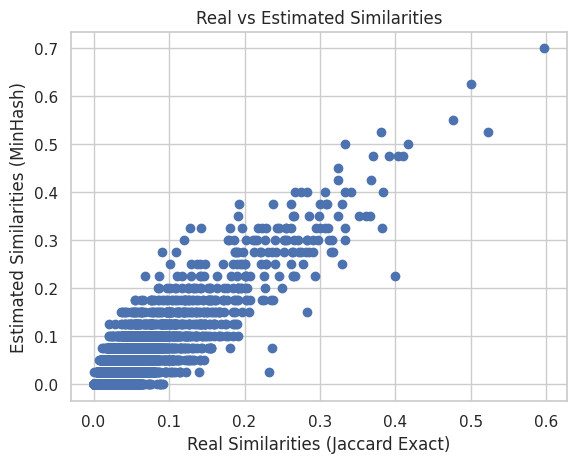

In [37]:
plt.scatter(real_similarities, estimated_similarities)
plt.xlabel('Real Similarities (Jaccard Exact)')
plt.ylabel('Estimated Similarities (MinHash)')
plt.title('Real vs Estimated Similarities')
plt.show()

The scatter plot above compares real similarities (computed using exact Jaccard similarity) on the x-axis with estimated similarities (calculated using MinHash signatures) on the y-axis. Each point represents a user pair, with its position determined by their real and estimated similarity scores.

Positive Correlation: The plot shows an upward trend, indicating a positive correlation between real and estimated similarities. As the real Jaccard similarity increases, the estimated similarity also tends to increase, demonstrating that MinHash effectively approximates similarity.
Spread at Lower Similarities: There is a high density of points concentrated near the lower left of the plot (low real and estimated similarities). This suggests that most user pairs have relatively low similarity, which is common in datasets with sparse interactions (e.g., users watching different sets of movies).
At higher real similarity values (e.g., above 0.4), the scatter points show better alignment with the diagonal. This suggests that MinHash performs more accurately for user pairs with higher real similarities.

The plot indicates that MinHash approximates real similarities reasonably well, especially for higher similarity values. However, improvements (e.g., increasing the number of hash functions or optimizing parameters) could reduce the spread and improve the accuracy of the estimations.

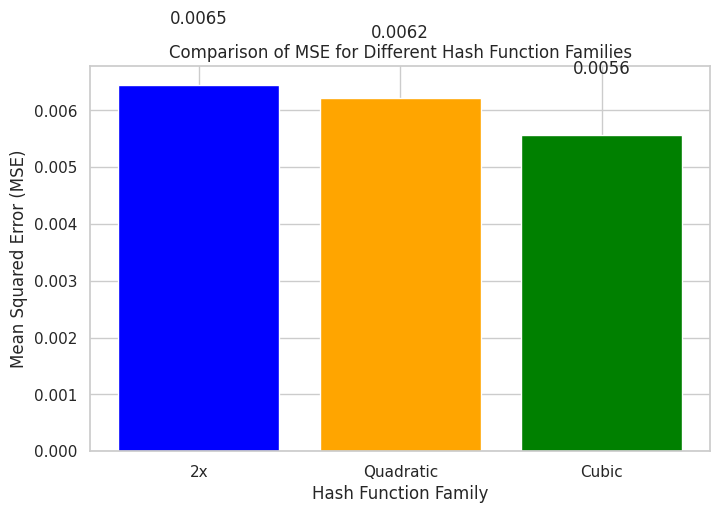

In [38]:
hash_methods = ['2x', 'Quadratic', 'Cubic']
mse_values = [ mse_2x, mse_quadratic, mse_cubic]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(hash_methods, mse_values, color=['blue', 'orange', 'green', 'red'])

# Add labels and title
plt.title('Comparison of MSE for Different Hash Function Families')
plt.xlabel('Hash Function Family')
plt.ylabel('Mean Squared Error (MSE)')

# Display MSE values on top of each bar
for i, mse in enumerate(mse_values):
    plt.text(i, mse + 0.001, f'{mse:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Thresholds from 0 to 1 with step 0.1
thresholds = np.linspace(0, 1, 11)

# Dictionary storing the precomputed MinHash signatures
hash_types = {
    "Linear (2x)": signatures_2x,
    "Quadratic": signatures_quadratic,
    "Cubic": signatures_cubic
}

# Predefined MSE values for each hash type
mse_values = {
    "Linear (2x)": 0.0065,
    "Quadratic": 0.0062,
    "Cubic": 0.0056
}

# Placeholder for calculated results
results = []

# Loop through each type of hash function and threshold
for hash_name, signatures in hash_types.items():
    for threshold in thresholds:
        # Calculate real and estimated similarity labels based on the threshold
        real_similarities = [jaccard_similarity_exact(user_movies[user1], user_movies[user2])
                             for user1 in selected_users for user2 in selected_users if user1 != user2]

        estimated_similarities = [jaccard_similarity_hashed(signatures[user1], signatures[user2])
                                  for user1 in selected_users for user2 in selected_users if user1 != user2]

        # Create binary labels: 1 if similarity exceeds the threshold, else 0
        real_labels = [1 if sim >= threshold else 0 for sim in real_similarities]
        estimated_labels = [1 if sim >= threshold else 0 for sim in estimated_similarities]

        # Compute Precision, Recall, and F1-Score
        precision = precision_score(real_labels, estimated_labels, zero_division=0)
        recall = recall_score(real_labels, estimated_labels, zero_division=0)
        f1 = f1_score(real_labels, estimated_labels, zero_division=0)

        # Retrieve the MSE value for the current hash type
        mse = mse_values[hash_name]

        # Store results in a list
        results.append((hash_name, threshold, precision, recall, f1, mse))

# Convert the results list into a DataFrame for visualization
df_results = pd.DataFrame(results, columns=['Hash Type', 'Threshold', 'Precision', 'Recall', 'F1-Score', 'MSE'])

# Print the results table
print(df_results)

      Hash Type  Threshold  Precision    Recall  F1-Score     MSE
0   Linear (2x)        0.0   1.000000  1.000000  1.000000  0.0065
1   Linear (2x)        0.1   0.465293  0.910828  0.615937  0.0065
2   Linear (2x)        0.2   0.516746  0.915254  0.660550  0.0065
3   Linear (2x)        0.3   0.476190  0.833333  0.606061  0.0065
4   Linear (2x)        0.4   0.260870  0.750000  0.387097  0.0065
5   Linear (2x)        0.5   0.333333  0.666667  0.444444  0.0065
6   Linear (2x)        0.6   0.000000  0.000000  0.000000  0.0065
7   Linear (2x)        0.7   0.000000  0.000000  0.000000  0.0065
8   Linear (2x)        0.8   0.000000  0.000000  0.000000  0.0065
9   Linear (2x)        0.9   0.000000  0.000000  0.000000  0.0065
10  Linear (2x)        1.0   0.000000  0.000000  0.000000  0.0065
11    Quadratic        0.0   1.000000  1.000000  1.000000  0.0062
12    Quadratic        0.1   0.433846  0.898089  0.585062  0.0062
13    Quadratic        0.2   0.559585  0.915254  0.694534  0.0062
14    Quad

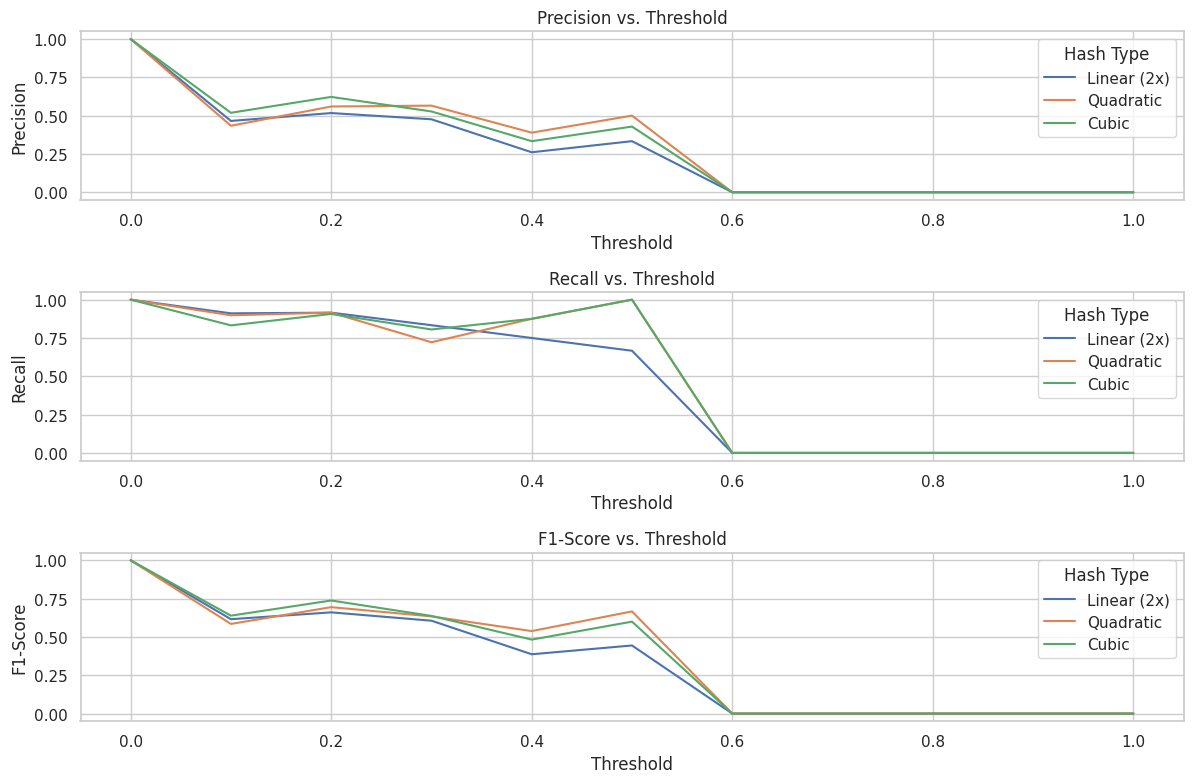

In [40]:
sns.set(style="whitegrid")

# Loop through each hash type to plot metrics vs. thresholds
metrics = ['Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i + 1)  # Create subplots for each metric
    for hash_type in df_results['Hash Type'].unique():
        subset = df_results[df_results['Hash Type'] == hash_type]
        plt.plot(subset['Threshold'], subset[metric], label=hash_type)

    plt.title(f'{metric} vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel(metric)
    plt.legend(title='Hash Type')
    plt.tight_layout()  # Adjust subplot spacing

plt.show()

### Interpretation of the Results:

The dataset represents the performance of three hash functions ("Linear (2x)", "Quadratic", and "Cubic") evaluated at different threshold levels based on several metrics: **Precision**, **Recall**, **F1-Score**, and **Mean Squared Error (MSE)**.

---



1. **Threshold = 0.0:**  
   - For all hash types, the performance is perfect: **Precision, Recall, and F1-Score are all 1.0**, indicating a perfect match between predictions and ground truth.
   - The **MSE values are low** across all hash types, with the "Cubic" hash achieving the lowest value (0.0056), indicating high accuracy.

2. **Increasing Threshold:**  
   - As the threshold increases, the **Precision and Recall decrease** significantly for all hash types, eventually reaching zero at higher thresholds (>= 0.6).
   - The degradation in performance suggests that stricter thresholds fail to classify any data points correctly, leading to **F1-Scores of 0**.

3. **MSE Stability:**  
   - The **MSE remains constant for each hash type** regardless of the threshold, which suggests that this metric may be less sensitive to threshold adjustments compared to the other metrics.

---

### Hash Type Comparisons:

1. **Linear (2x):**  
   - Shows a rapid decline in **Precision** and **F1-Score** as the threshold increases.  
   - For thresholds between 0.1 and 0.5, Precision and Recall fluctuate but are generally lower than those of the other hash types.  
   - By **Threshold >= 0.6**, performance drops to zero for all metrics.

2. **Quadratic:**  
   - Performs slightly better than "Linear (2x)" at intermediate thresholds (e.g., **Threshold = 0.2 to 0.5**), achieving higher **Precision** and **F1-Scores**.  
   - At **Threshold = 0.5**, it achieves a perfect **Recall (1.0)** and a relatively high **Precision (0.5)**, resulting in a strong F1-Score (0.67).  
   - Similar to "Linear (2x)", performance drops to zero for thresholds beyond 0.5.

3. **Cubic:**  
   - Performs the best overall at intermediate thresholds (e.g., **Threshold = 0.2**), with the highest **Precision (0.62)** and **F1-Score (0.74)**.  
   - At **Threshold = 0.5**, it achieves **Recall = 1.0** and a respectable **Precision (0.43)**.  
   - The **MSE is consistently the lowest (0.0056)**, indicating greater accuracy in predictions.

---


- **Best Overall Performance:**  
   - At **Threshold = 0.2**, the "Cubic" hash provides the best trade-off between Precision, Recall, and F1-Score, while maintaining a low MSE.
   - For applications requiring higher Precision or Recall with minimal trade-offs, **"Cubic" at Threshold = 0.2 or 0.3** is the most suitable choice.

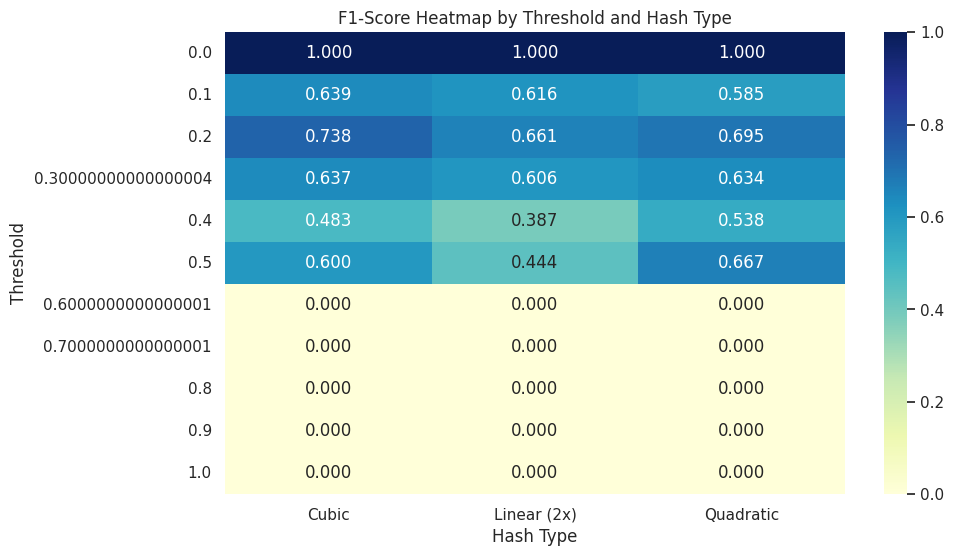

In [42]:
heatmap_data = df_results.pivot(index='Threshold', columns='Hash Type', values='F1-Score')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".3f")

# Add labels and title
plt.title('F1-Score Heatmap by Threshold and Hash Type')
plt.xlabel('Hash Type')
plt.ylabel('Threshold')
plt.show()

The Heatmap validates the results we obteined previously.

### **1.3 Locality-Sensitive Hashing (LSH)**


---


The function identifies users who are similar to a given `user` by:
1. Checking which users share the same buckets in an LSH-based structure.
2. Optionally calculating Jaccard similarity between sets of items associated with users .
3. Adjusting LSH parameters if no similar users are initially found, to increase the granularity of the search.

---

### **Parameters**
1. **`user` (int)**:
   - The target user for whom the most similar users are being identified.

2. **`buckets` (dict)**:
   - A dictionary where each key is a bucket hash, and each value is a list of user IDs in that bucket.
   - Used to group users that are "close" in similarity based on MinHash signatures.

3. **`user_movie_dict` (dict, optional)**:
   - Maps each user ID to a set of movies they have interacted with.
   - Provides additional data for calculating Jaccard similarity between users.

4. **`minhash_signatures` (dict, optional)**:
   - A dictionary of MinHash signatures used for locality-sensitive hashing (LSH).
   - Required for adjusting LSH parameters dynamically.

5. **`num_bands` (int, optional)**:
   - The number of bands used in the LSH process. Higher values reduce the granularity of matching, while lower values increase it.

6. **`rows_per_band` (int, optional)**:
   - Specifies how many rows are used per band in the LSH process.

---

### **Output**
- **Returns**: A list of the two most similar users to the target user.

---



In [44]:
user_ids = list(signatures_quadratic.keys())
#user_ids
# User Ids are retrievable

In [51]:
num_bands = 40
rows_per_band = len(next(iter(signatures_quadratic.values()))) // num_bands

buckets, candidates = LSH_Scratch(signatures_quadratic, num_bands, rows_per_band)



In [52]:
for bucket_hash, users in buckets.items():
    print(f"Bucket {bucket_hash} contains {len(users)} users: {users}")


Bucket -8685446055735749098 contains 5 users: [2, 10, 66, 76, 78]
Bucket -5311964840707597948 contains 2 users: [4, 30]
Bucket 2435922378591715996 contains 13 users: [5, 6, 8, 12, 17, 19, 22, 39, 43, 48, 61, 75, 80]
Bucket 6603187098186749909 contains 4 users: [11, 56, 49, 71]
Bucket -5108679914142342051 contains 9 users: [13, 34, 57, 68, 84, 87, 93, 35, 43]
Bucket -5818469919667025092 contains 3 users: [16, 59, 97]
Bucket -5319974492634087654 contains 7 users: [20, 21, 25, 67, 72, 85, 99]
Bucket 1718122721140543249 contains 5 users: [23, 46, 70, 73, 74]
Bucket -5607252918241543273 contains 5 users: [24, 29, 49, 69, 90]
Bucket -5092738187355626423 contains 2 users: [26, 32]
Bucket 7963517802042054204 contains 4 users: [27, 58, 82, 88]
Bucket 4108603046994575951 contains 2 users: [35, 96]
Bucket -6771437957256884992 contains 2 users: [38, 64]
Bucket -5826479571593514798 contains 2 users: [40, 100]
Bucket 1211617642181116105 contains 4 users: [42, 44, 55, 86]
Bucket 5863403029610940212 c

In [53]:
print("\nCandidate Pairs for Similarity Checks:")
count = 0
for pair in candidates:
    print(pair)
    count += 1
    if count == 10:
        print("... (truncated)")
        break



Candidate Pairs for Similarity Checks:
(13, 88)
(16, 93)
(55, 84)
(28, 67)
(29, 32)
(47, 80)
(8, 9)
(40, 41)
(5, 83)
(6, 48)
... (truncated)


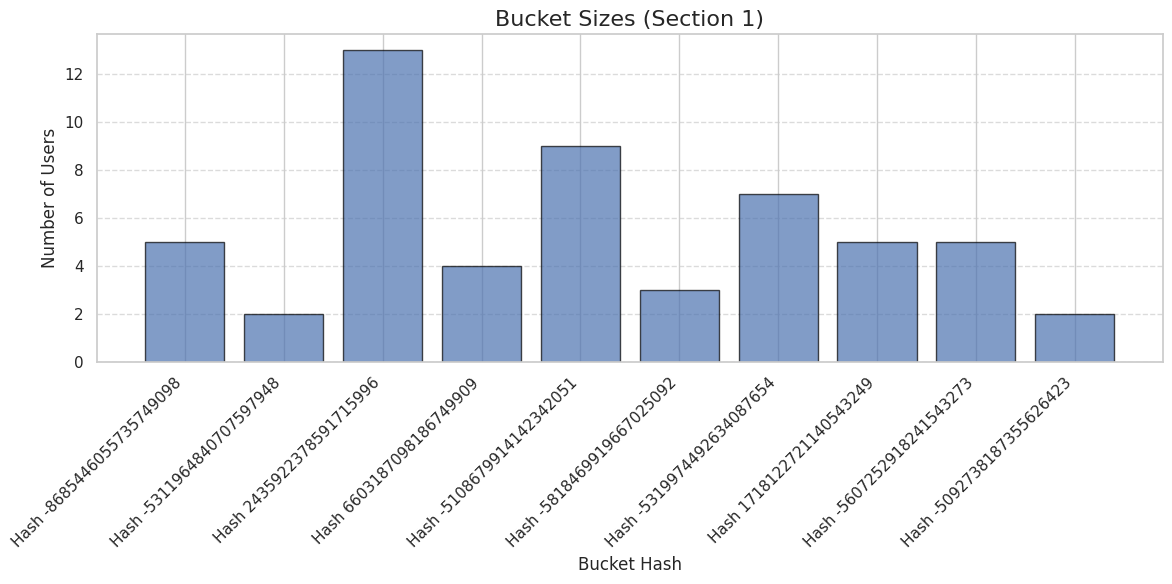

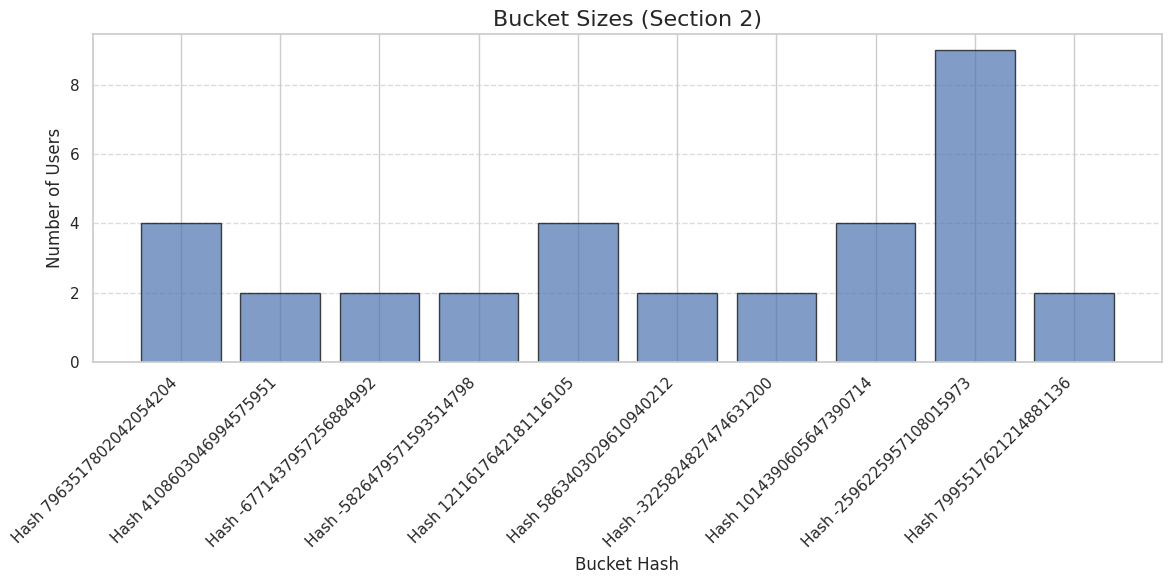

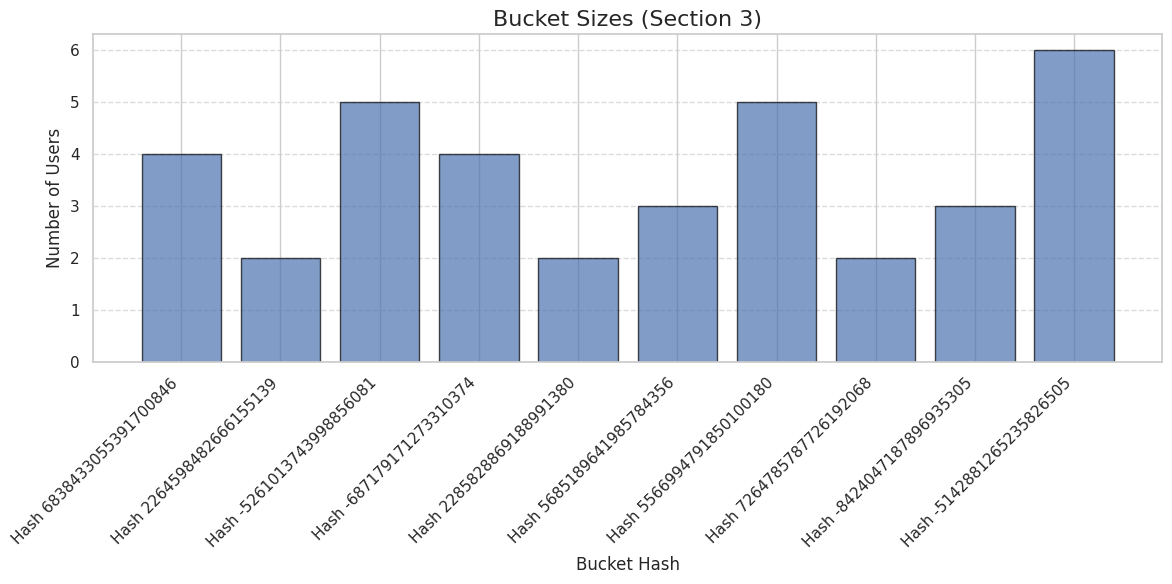

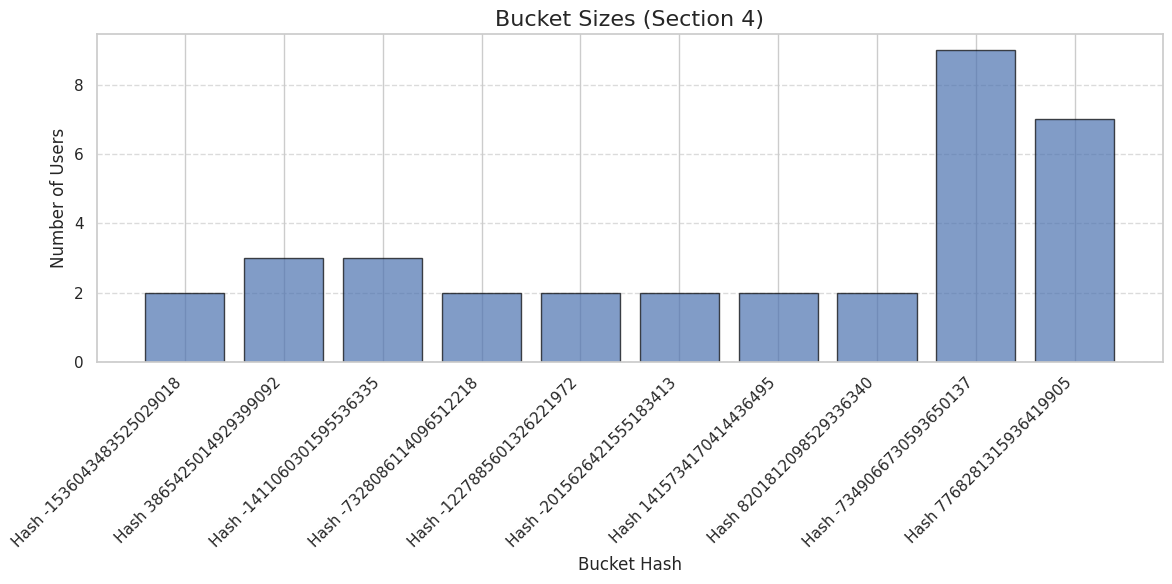

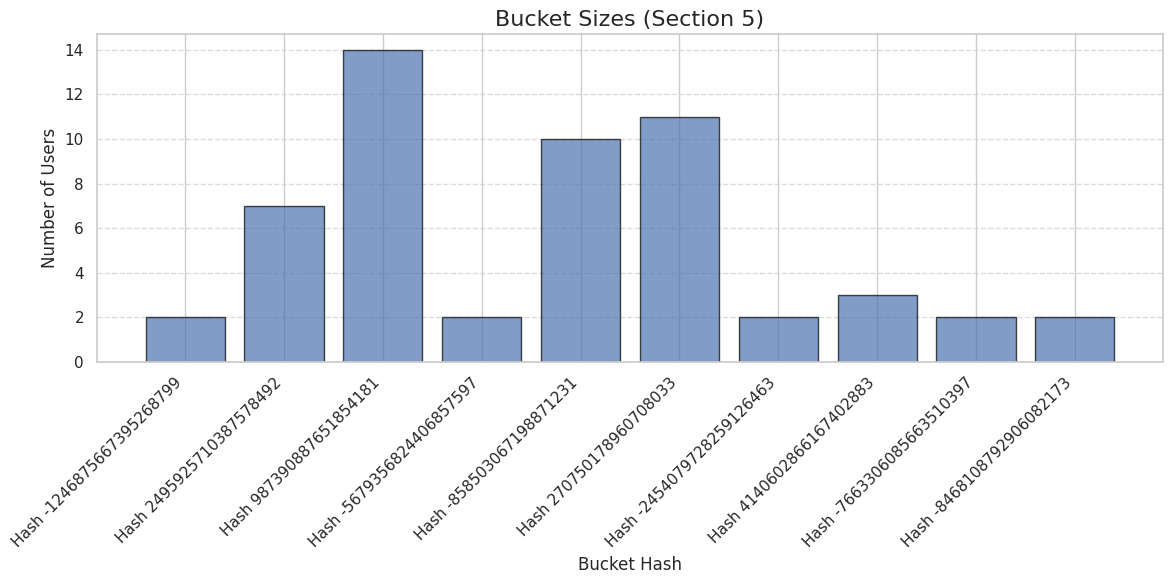

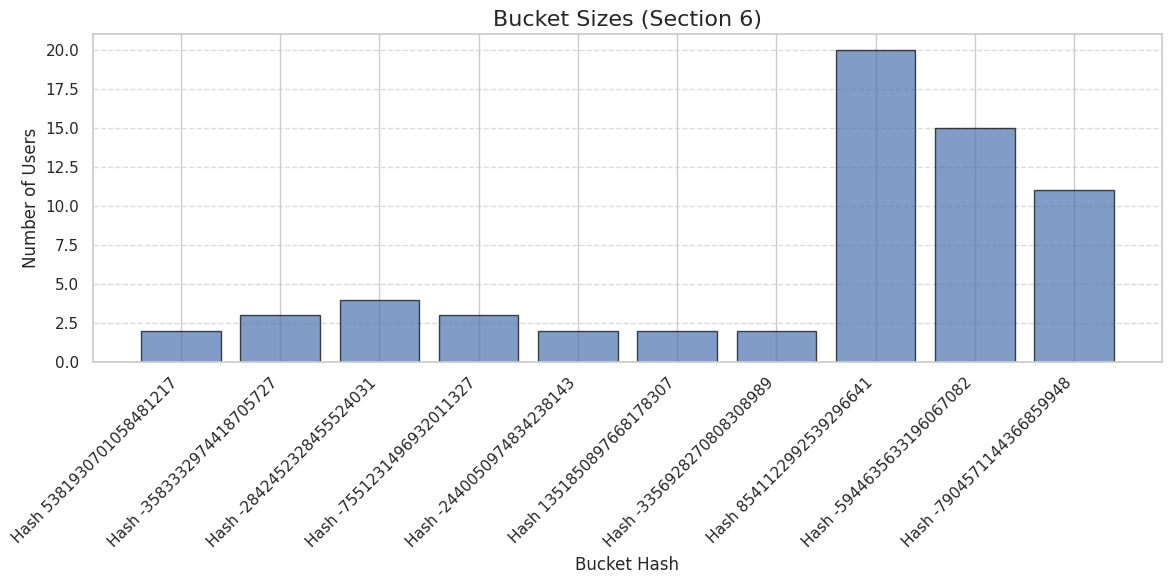

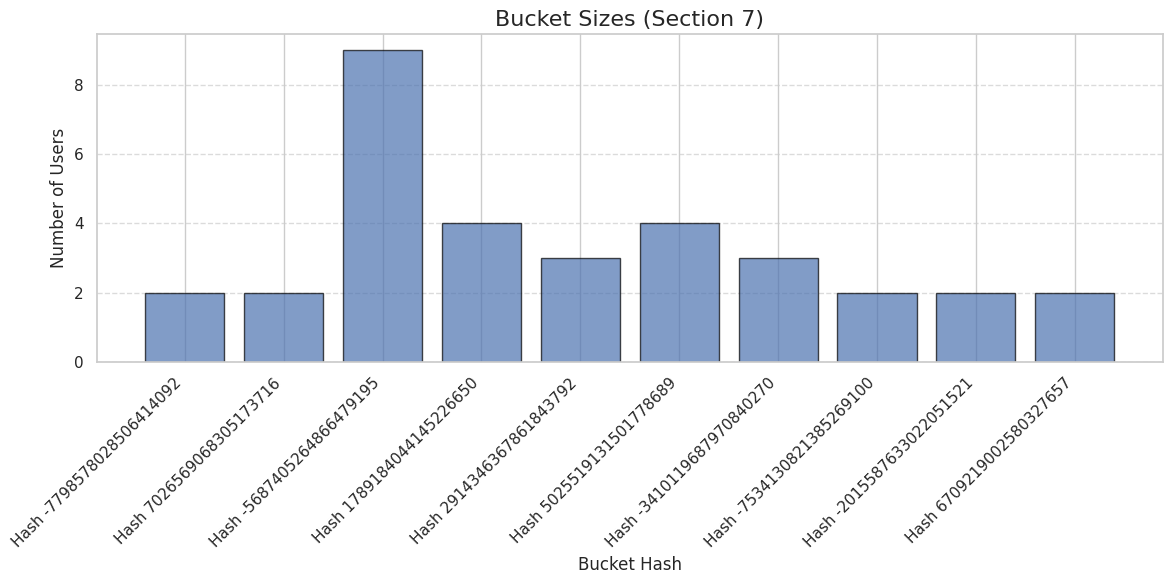

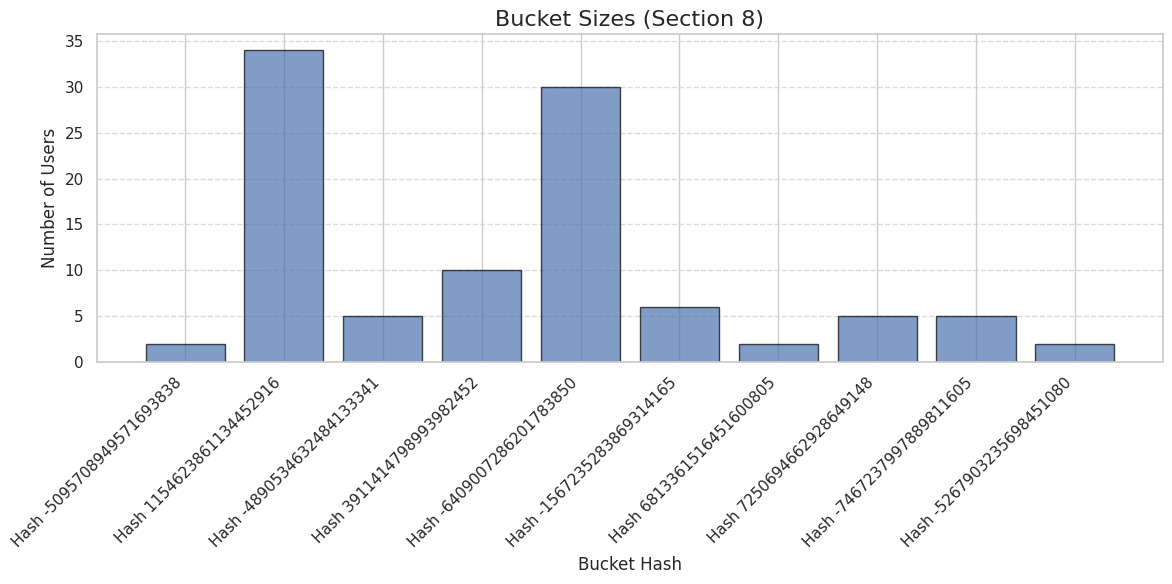

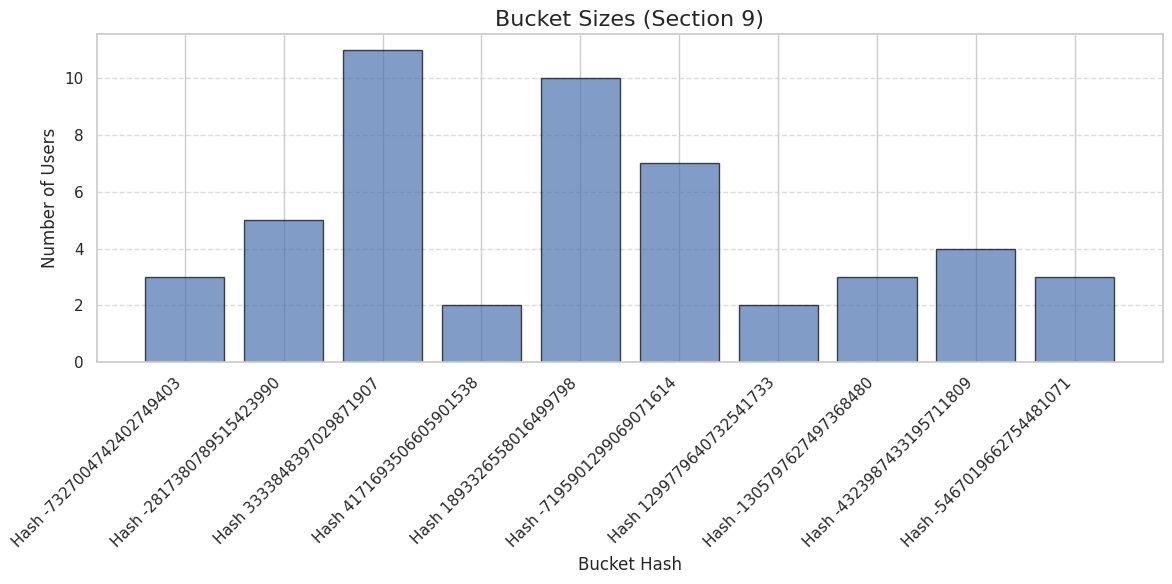

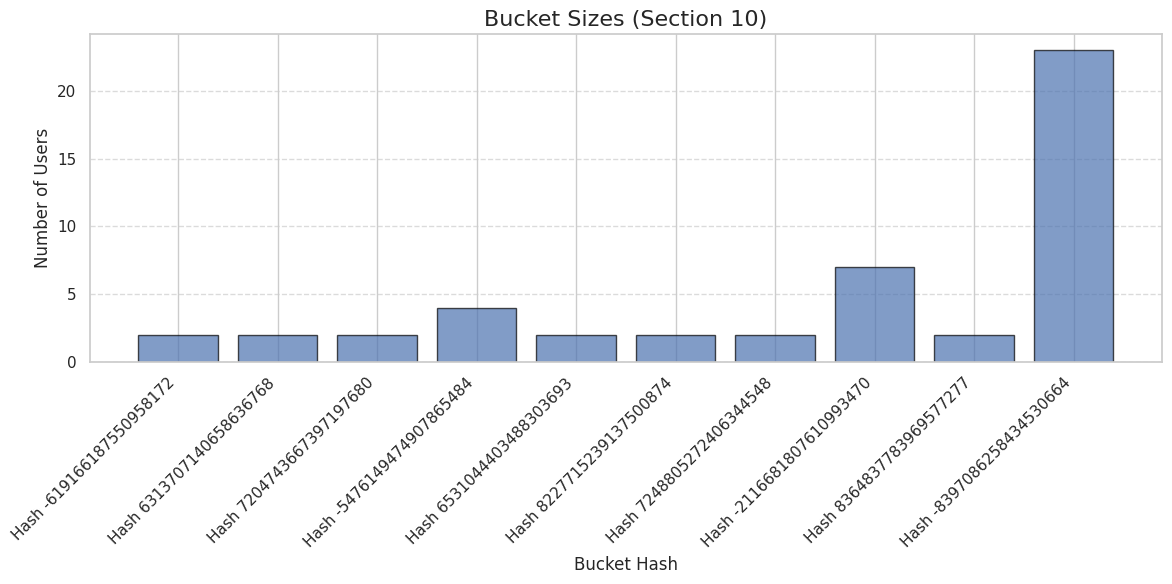

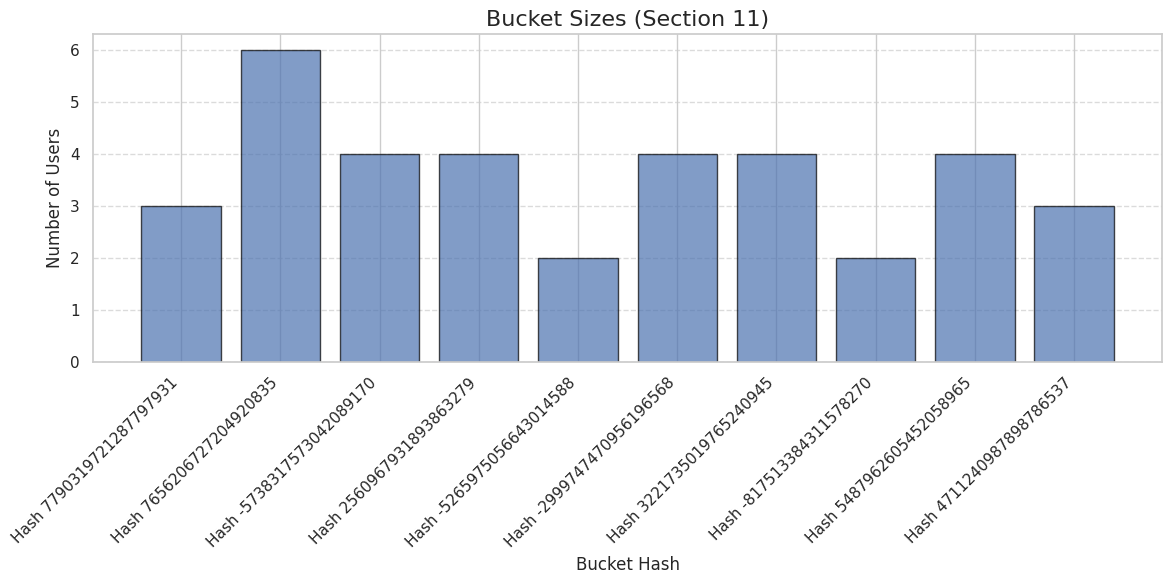

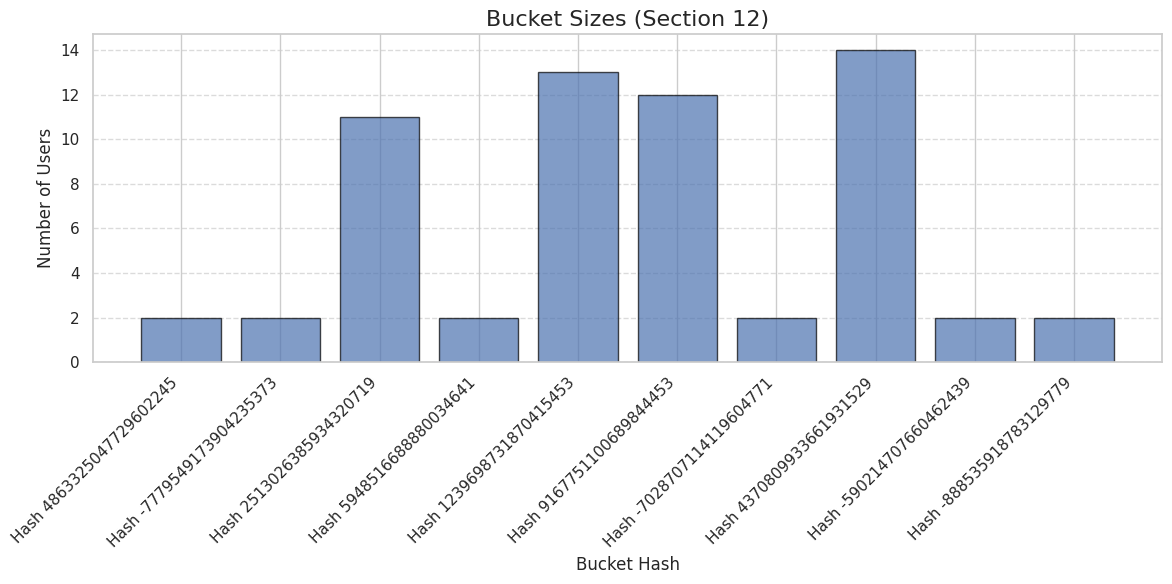

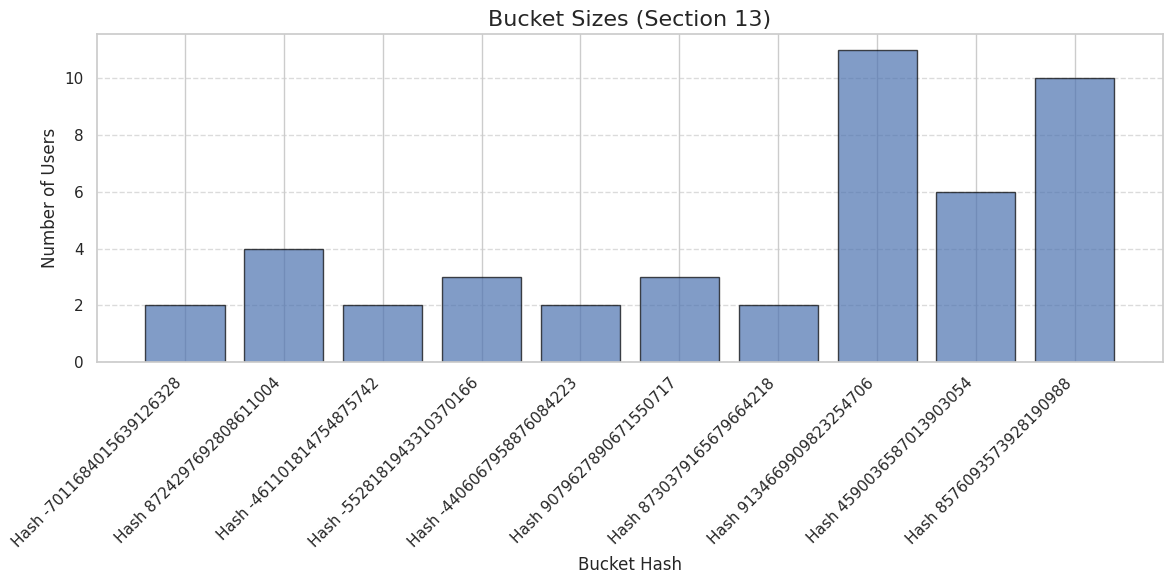

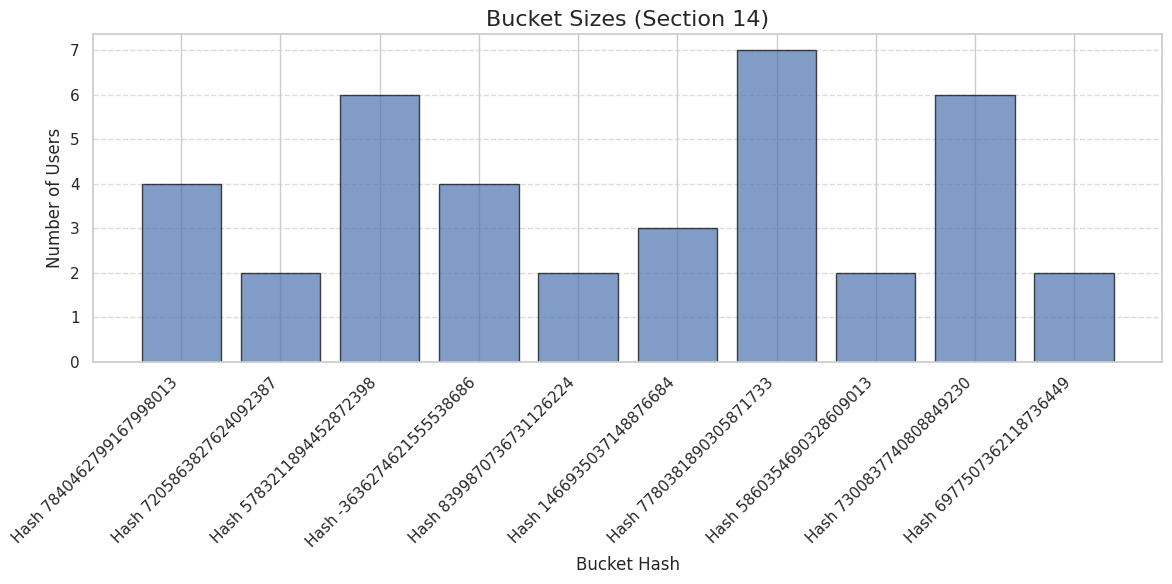

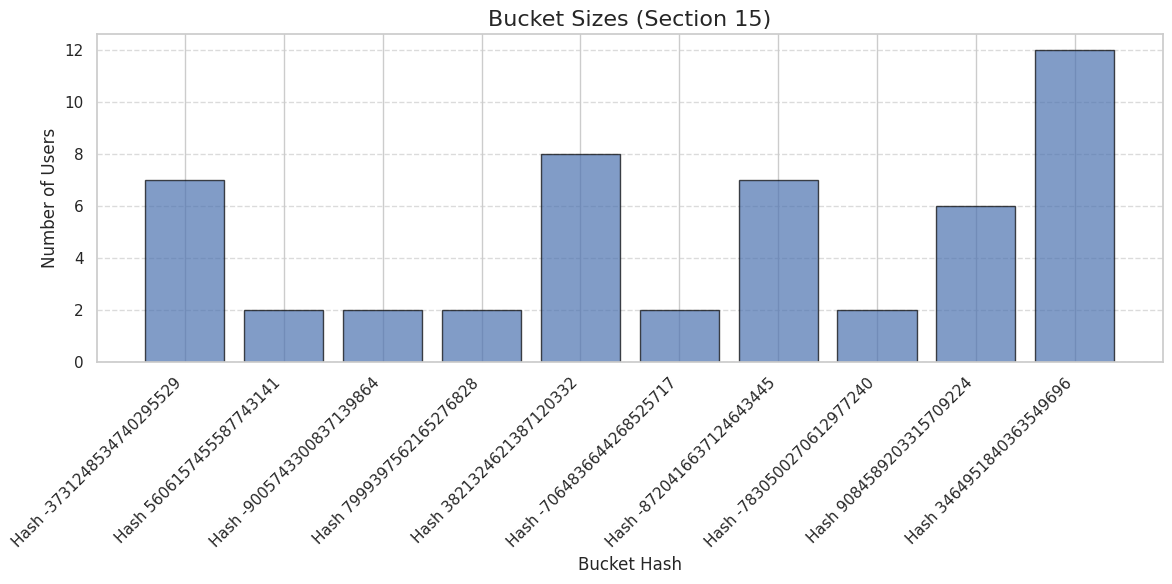

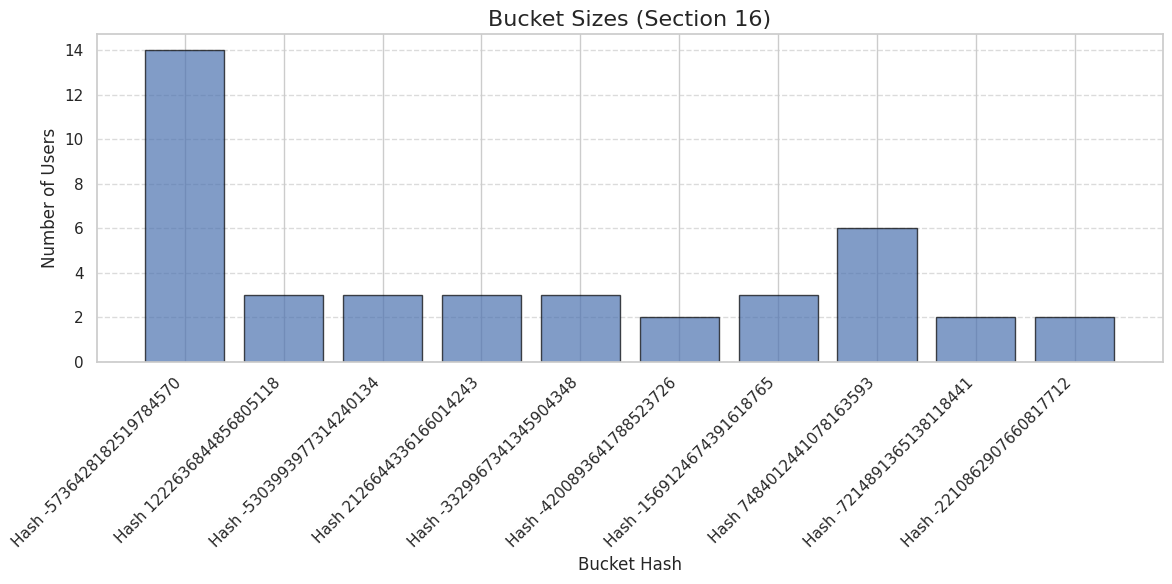

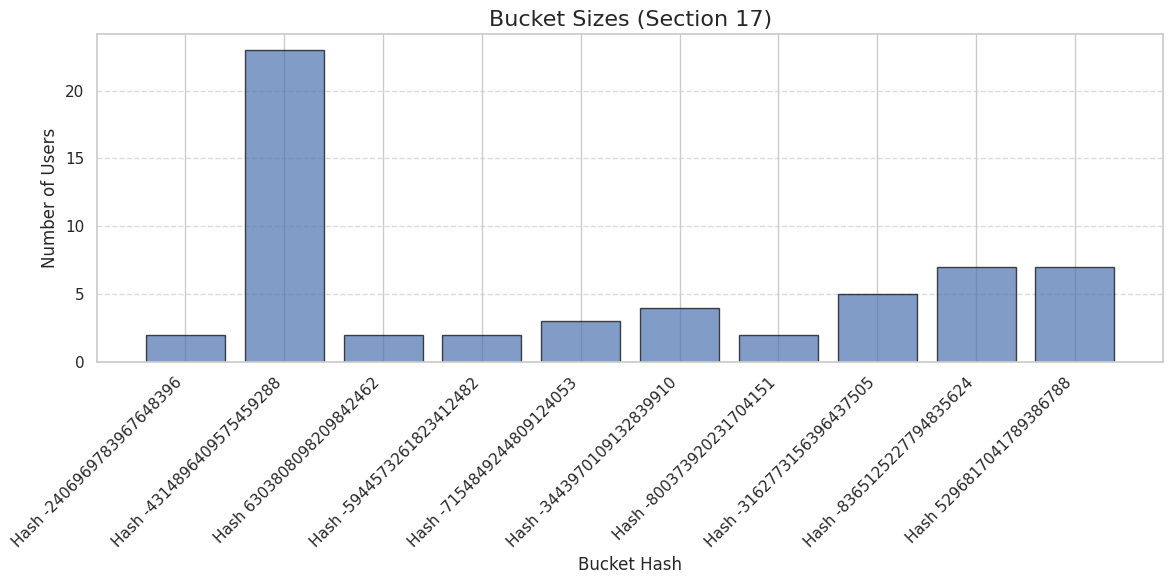

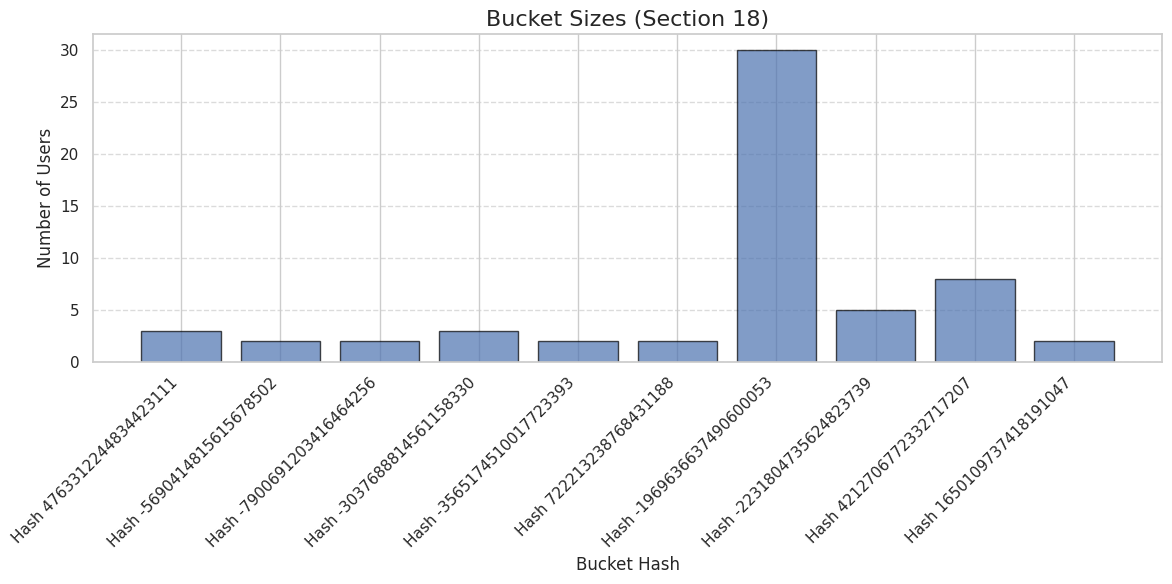

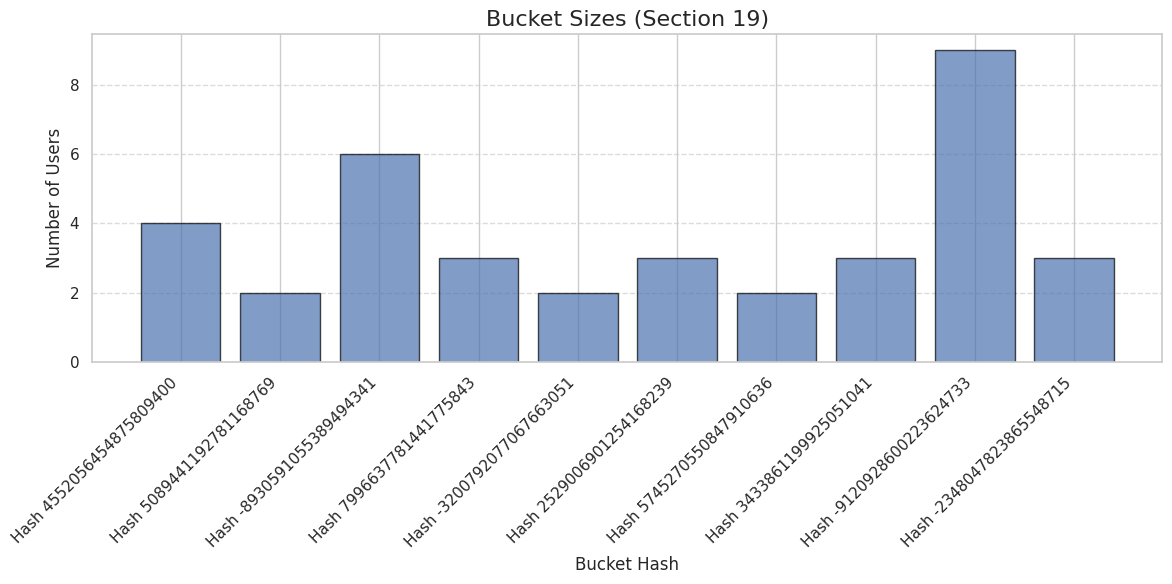

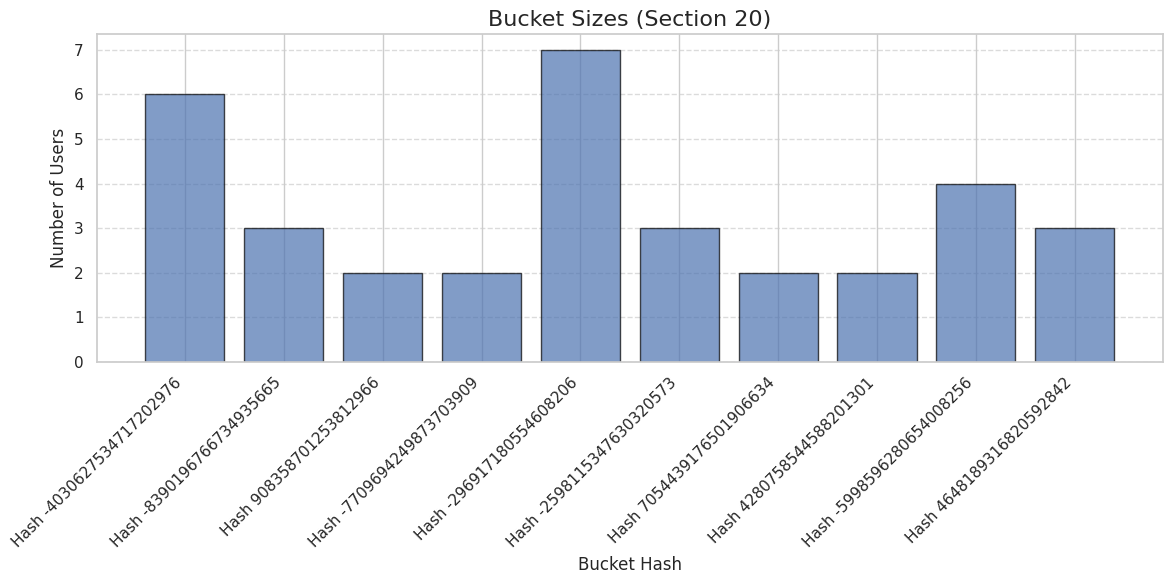

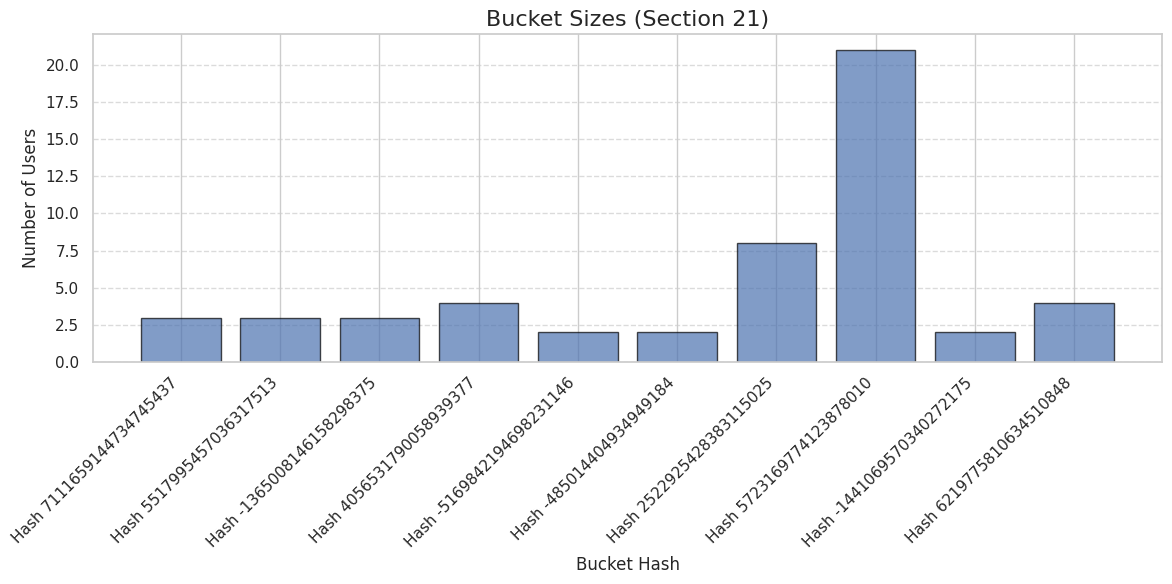

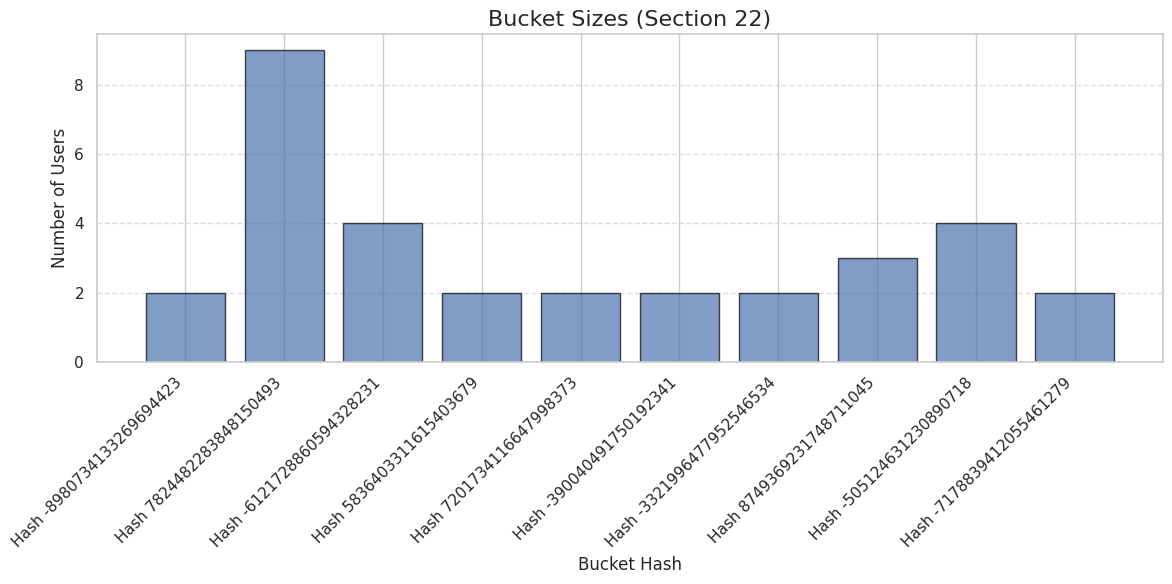

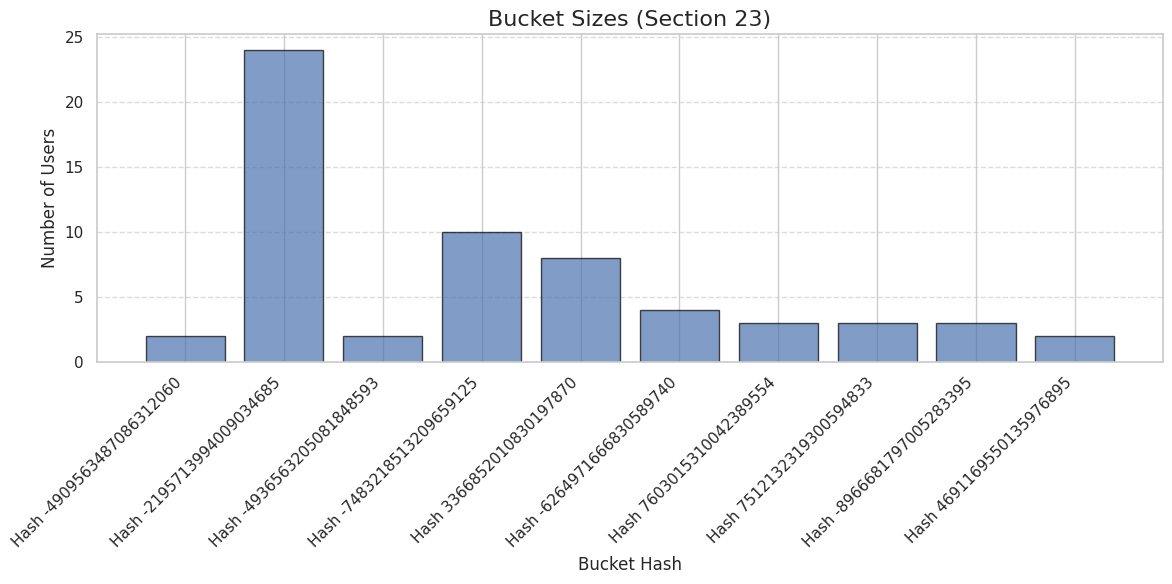

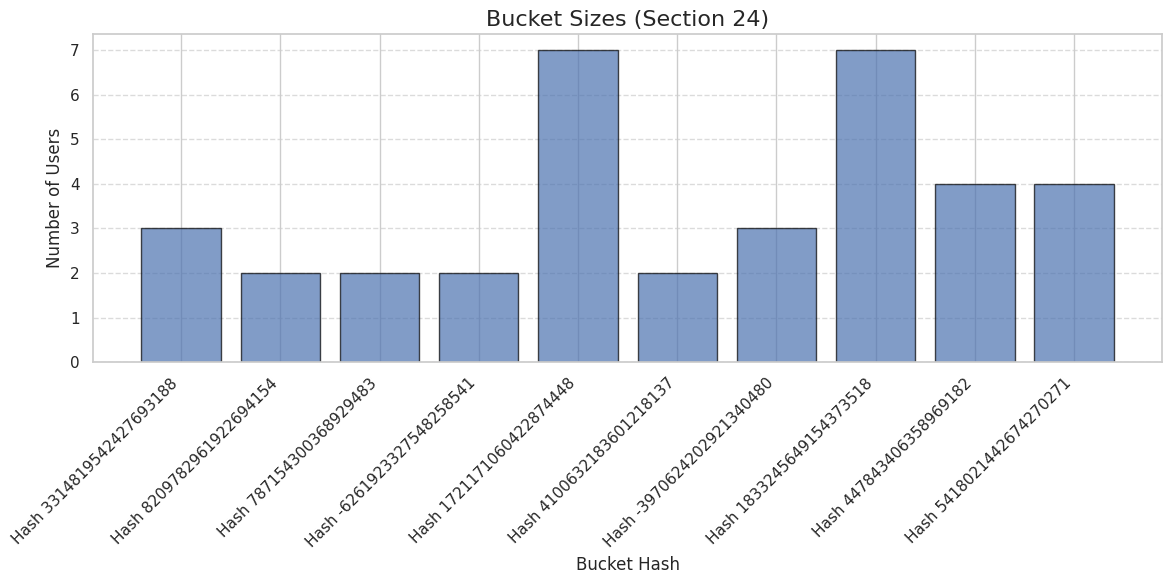

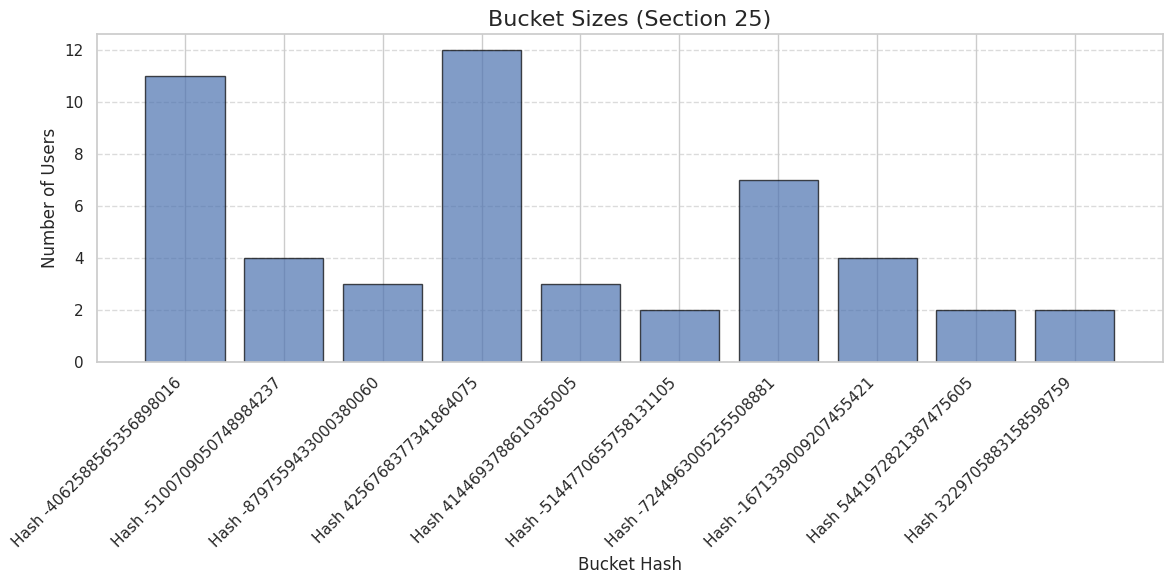

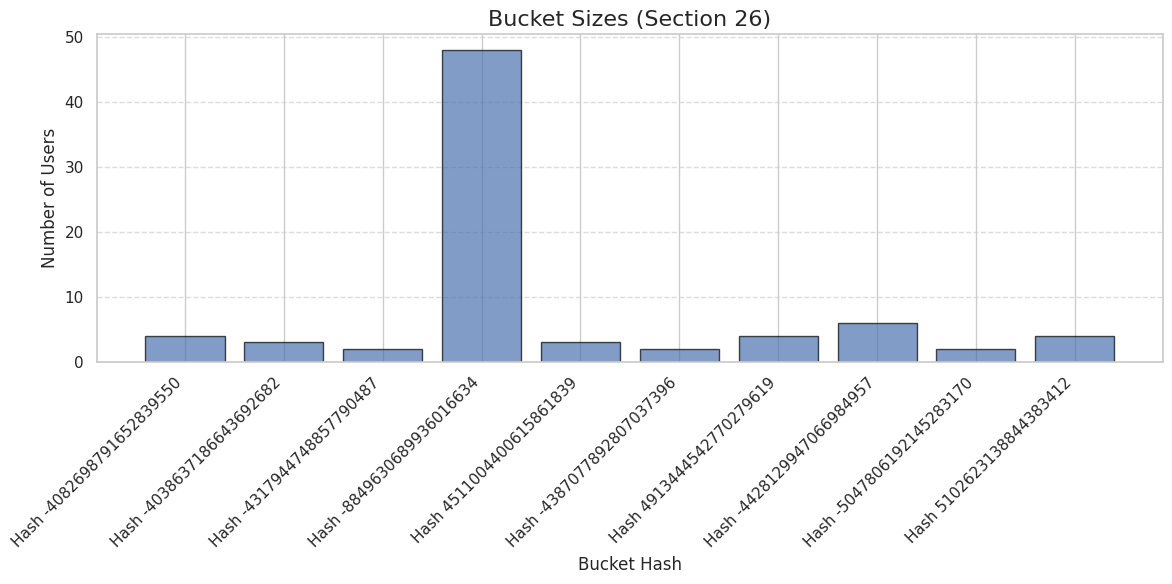

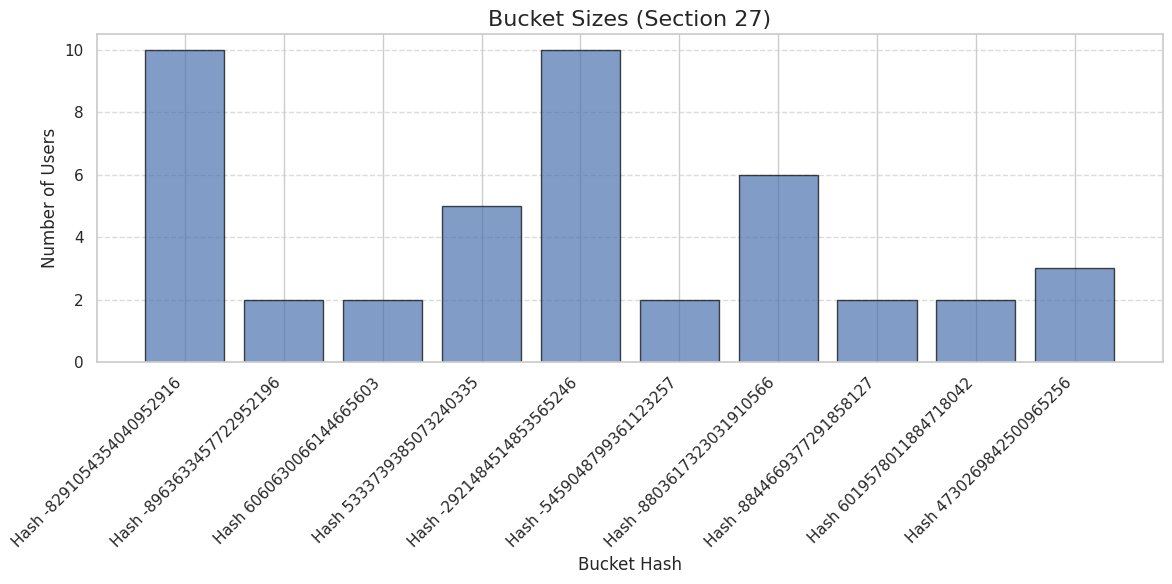

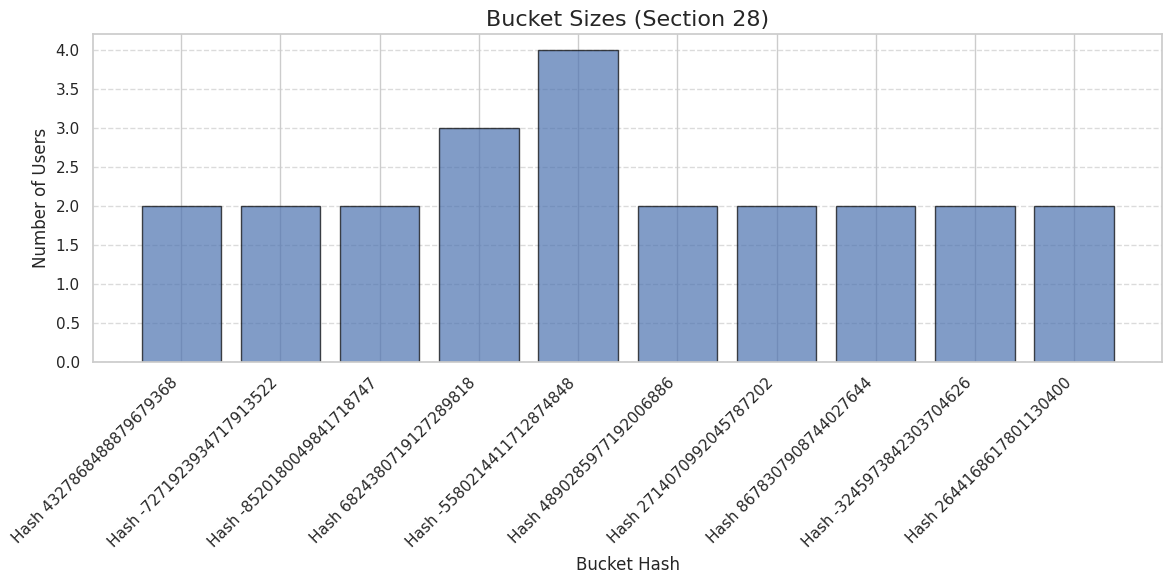

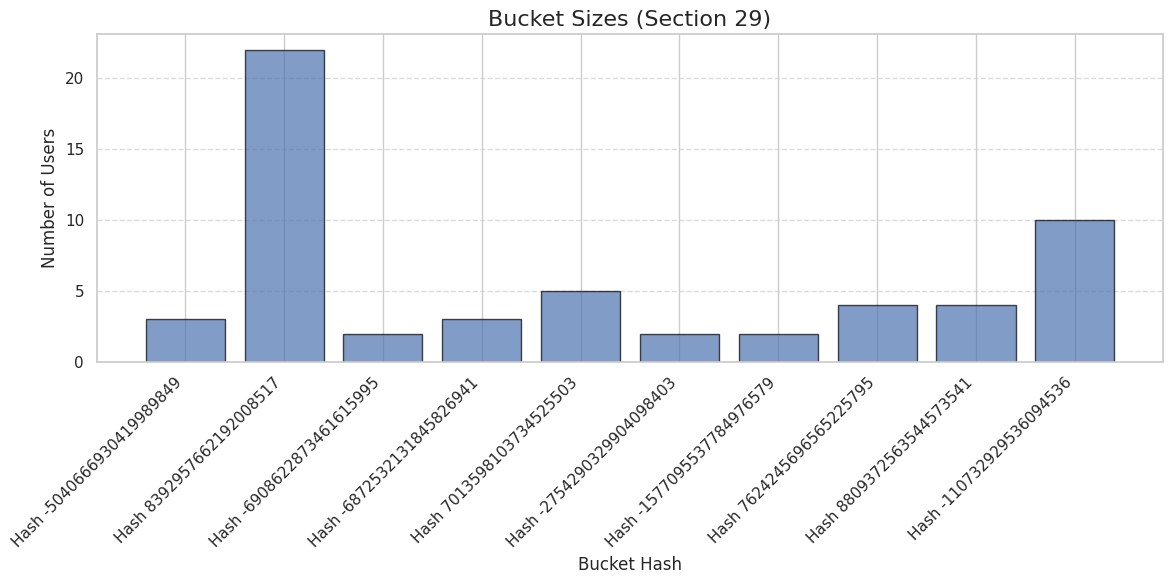

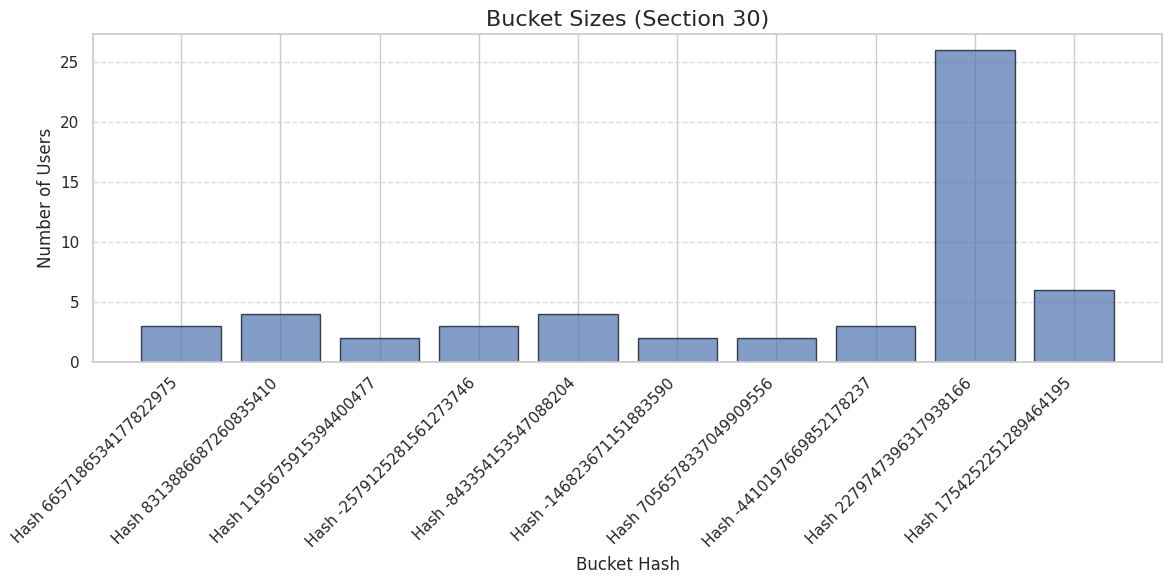

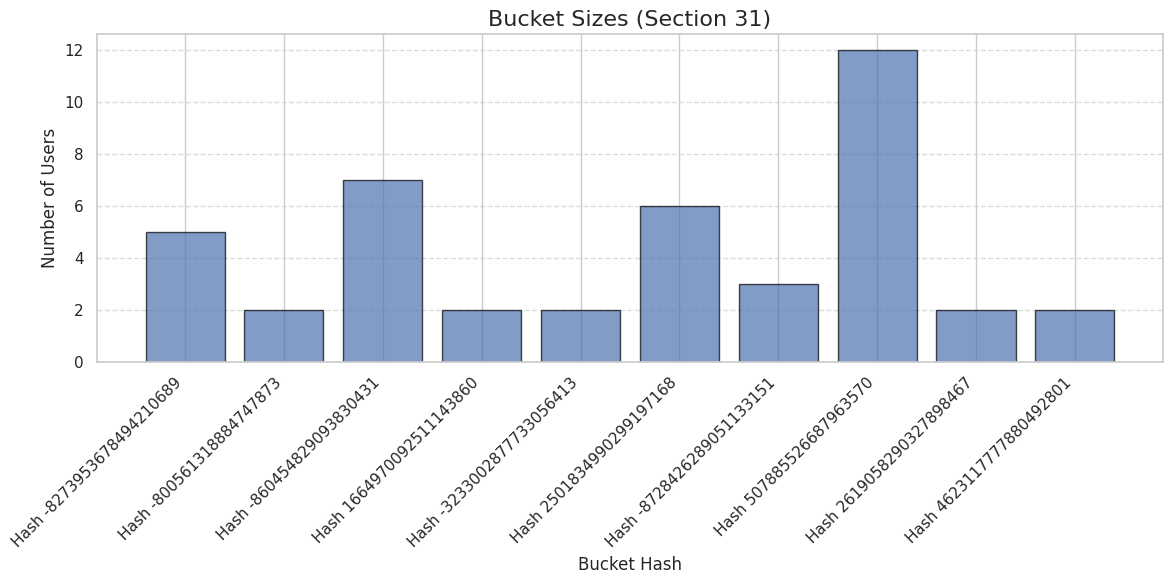

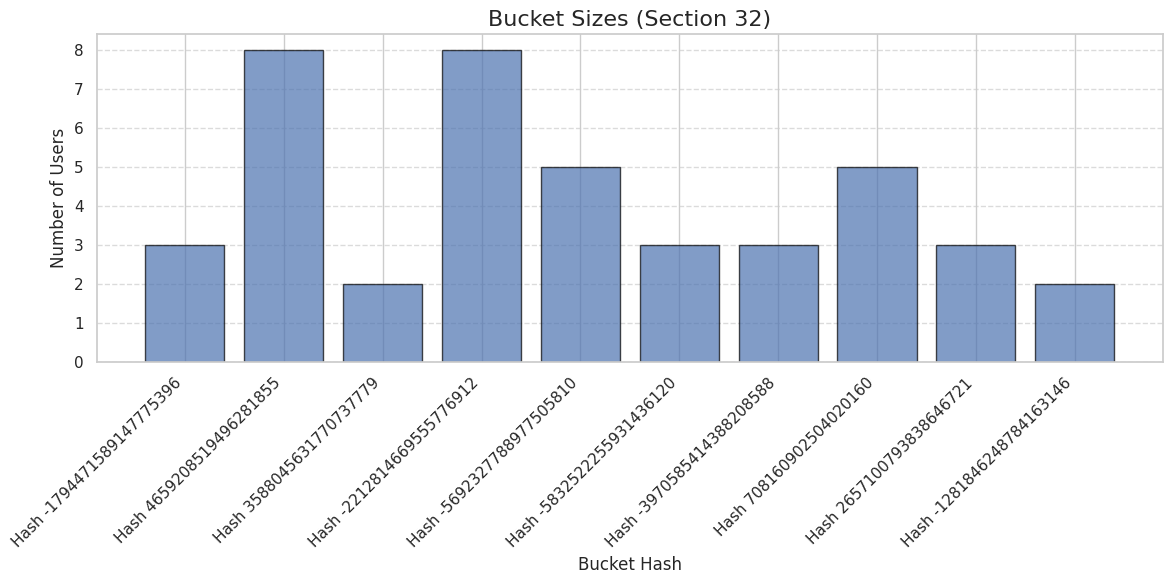

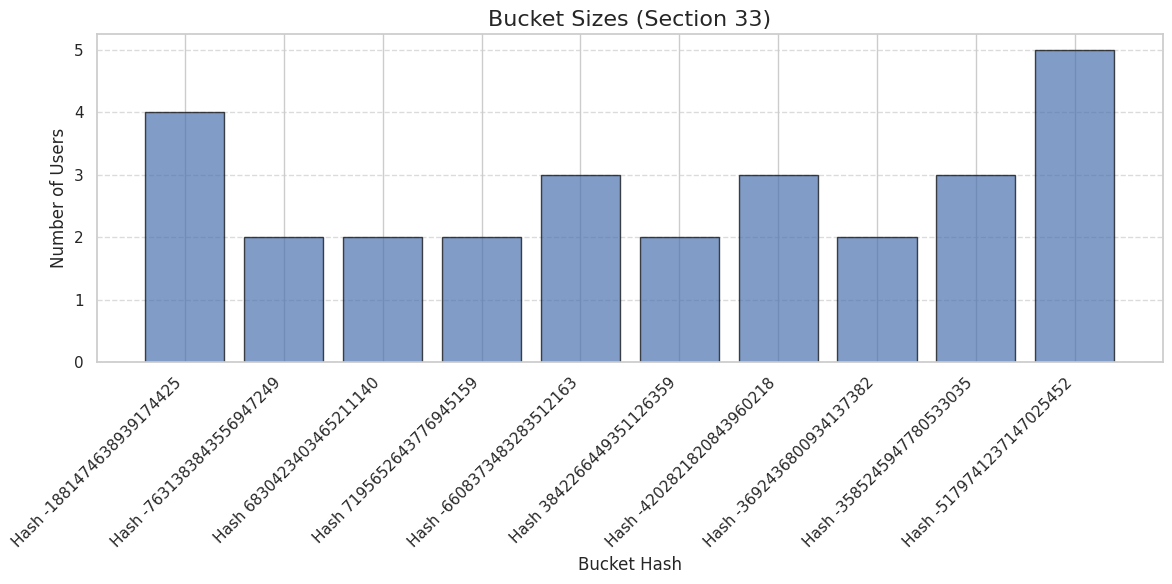

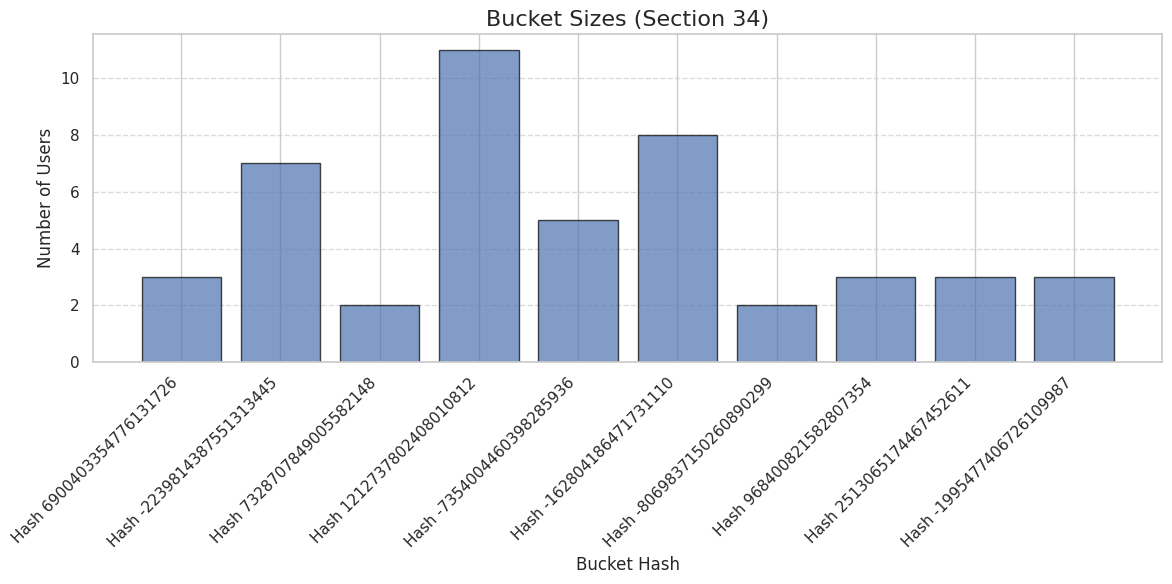

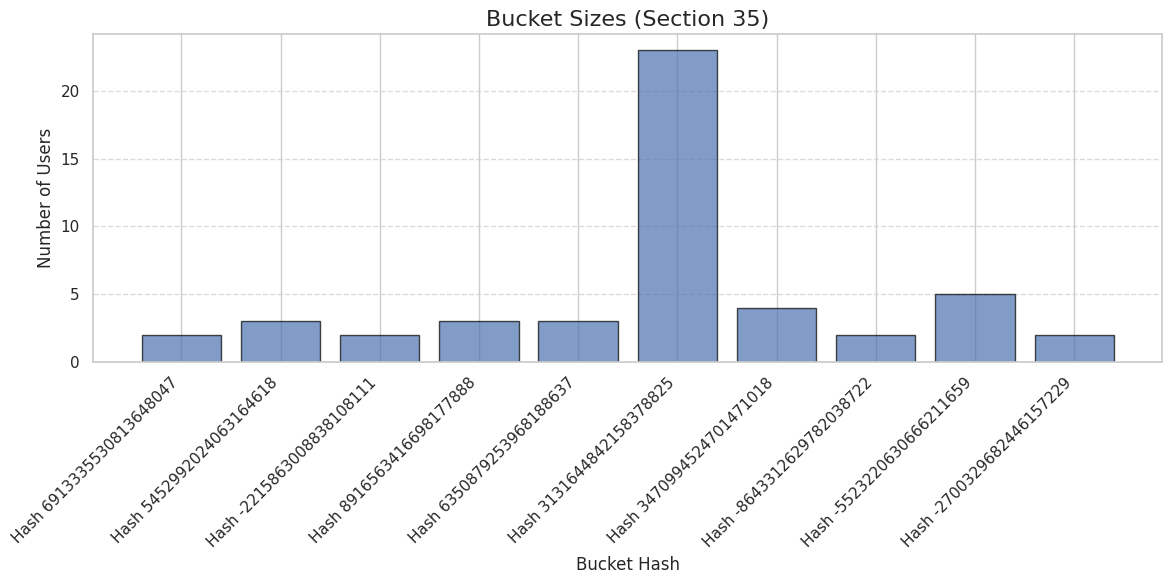

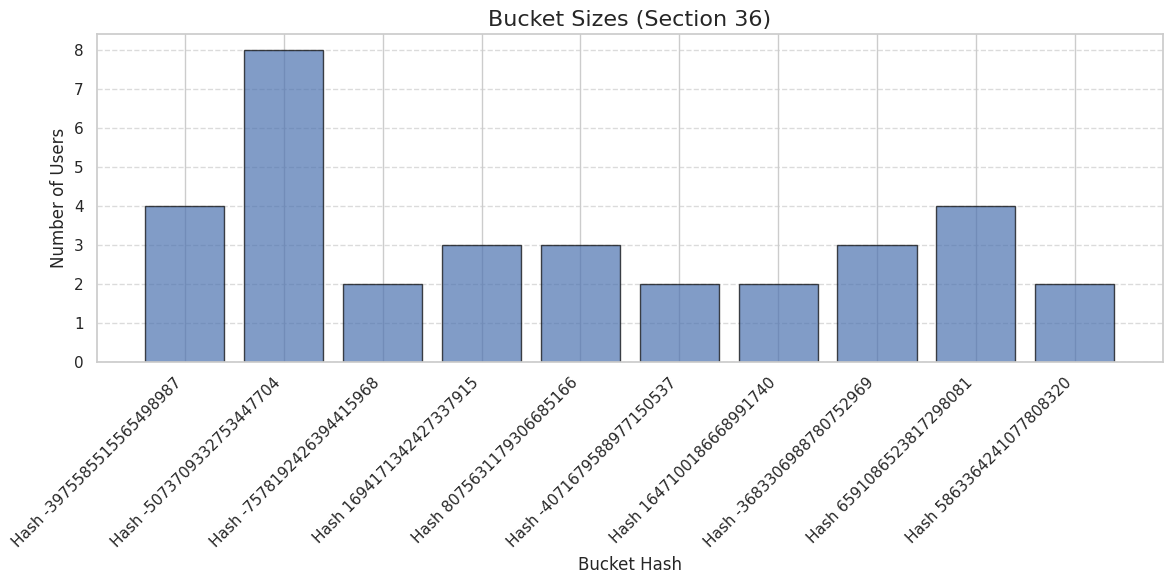

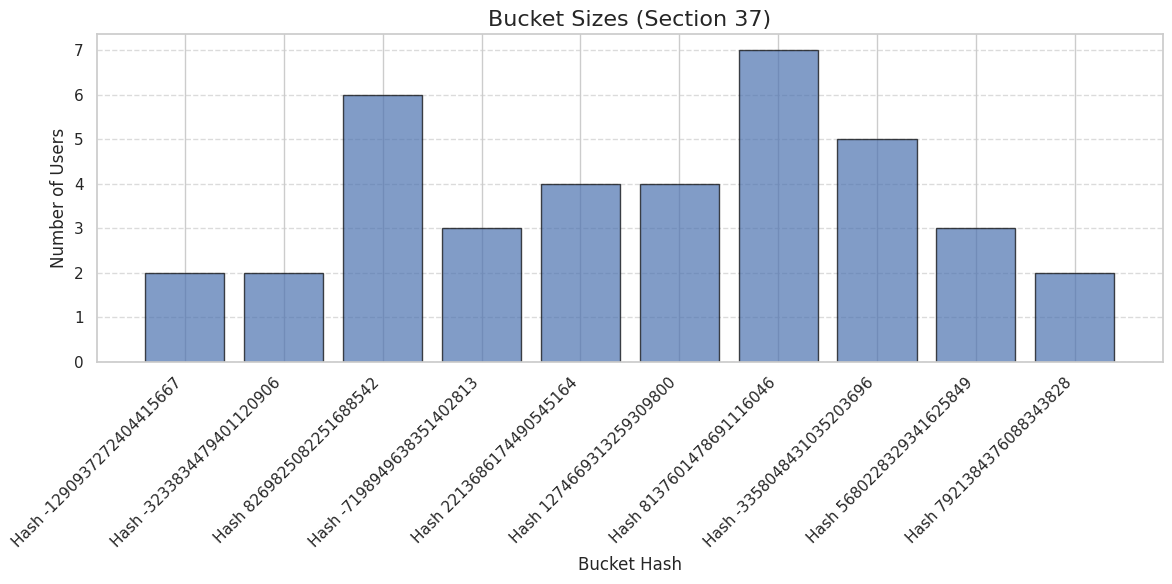

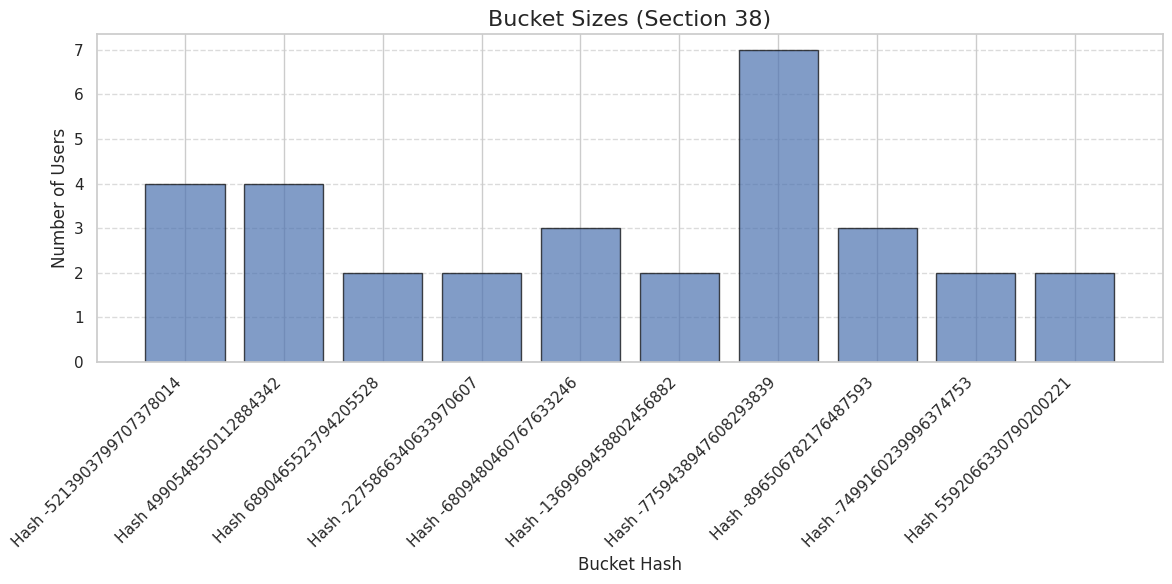

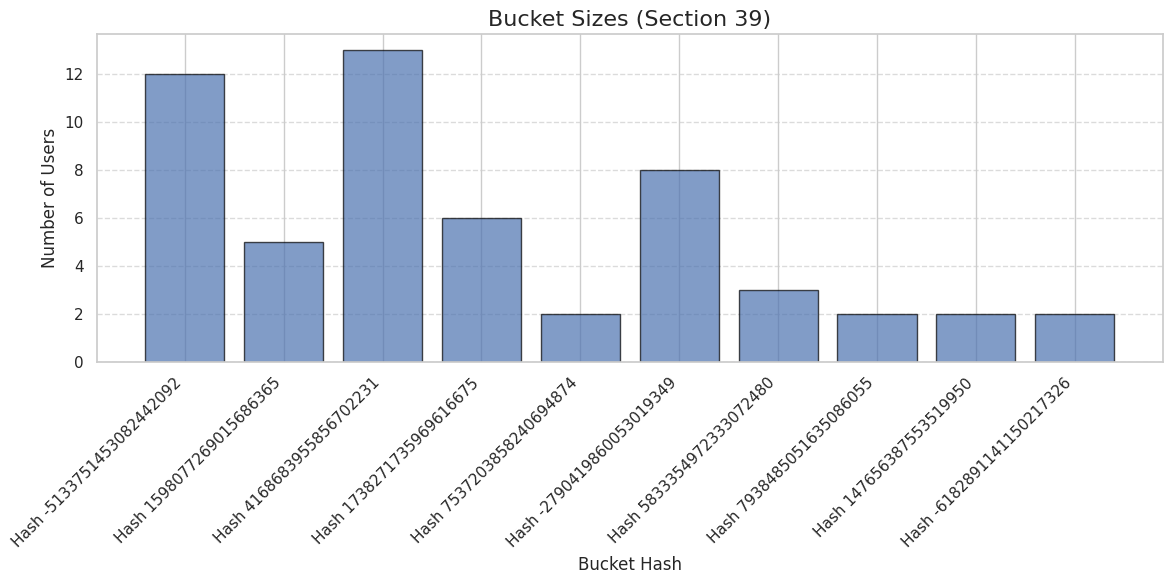

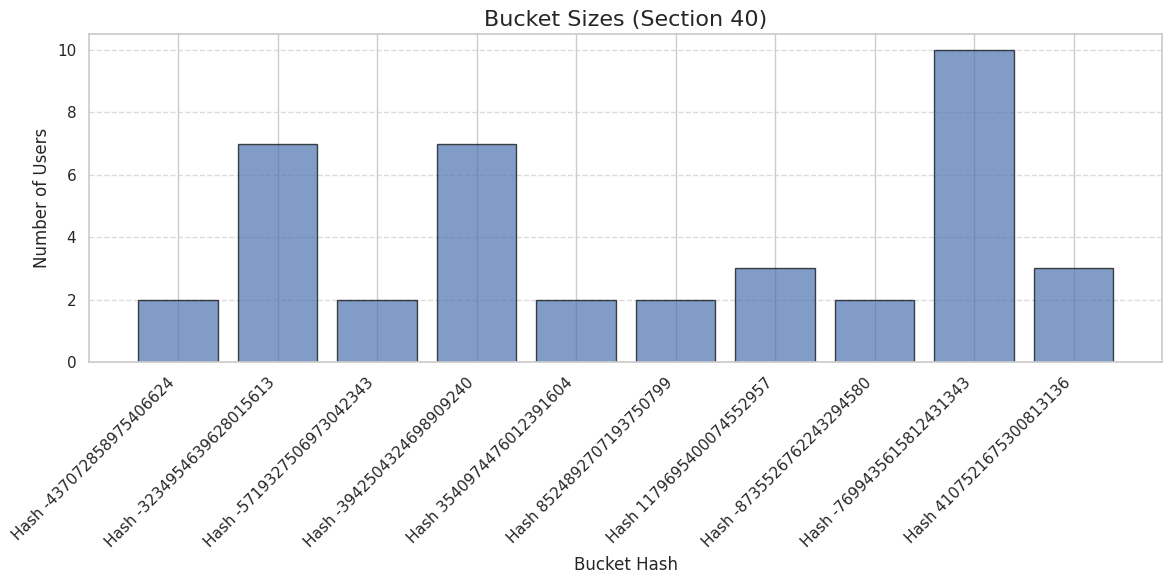

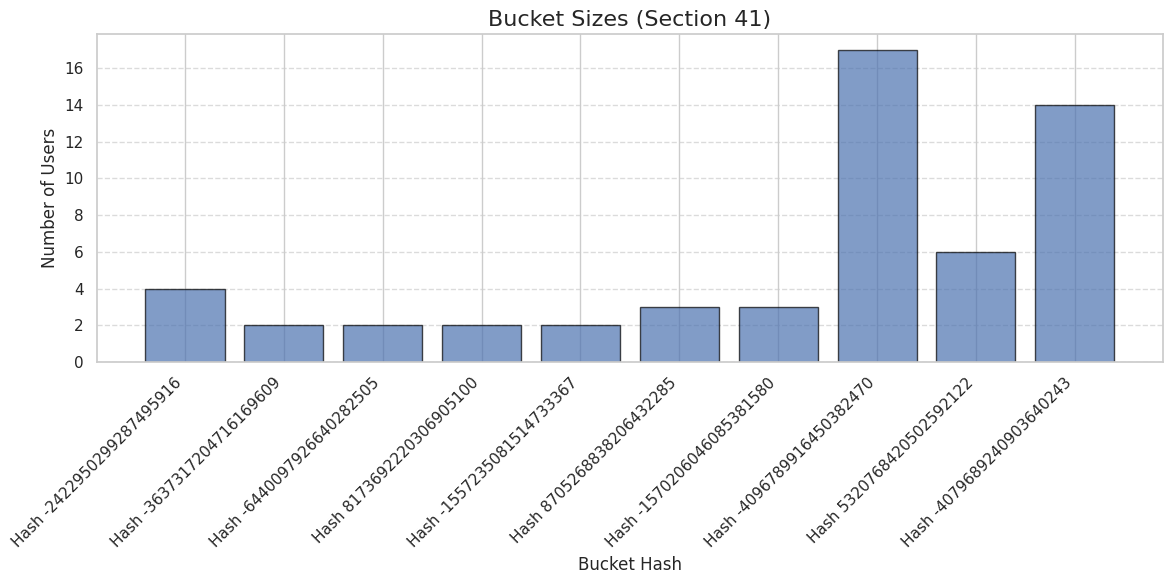

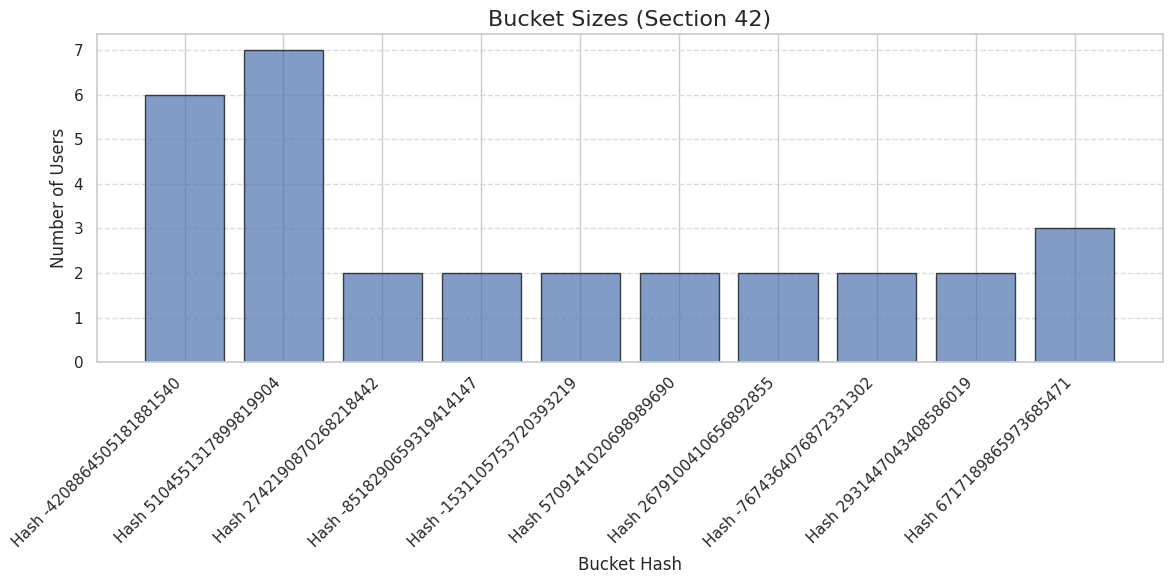

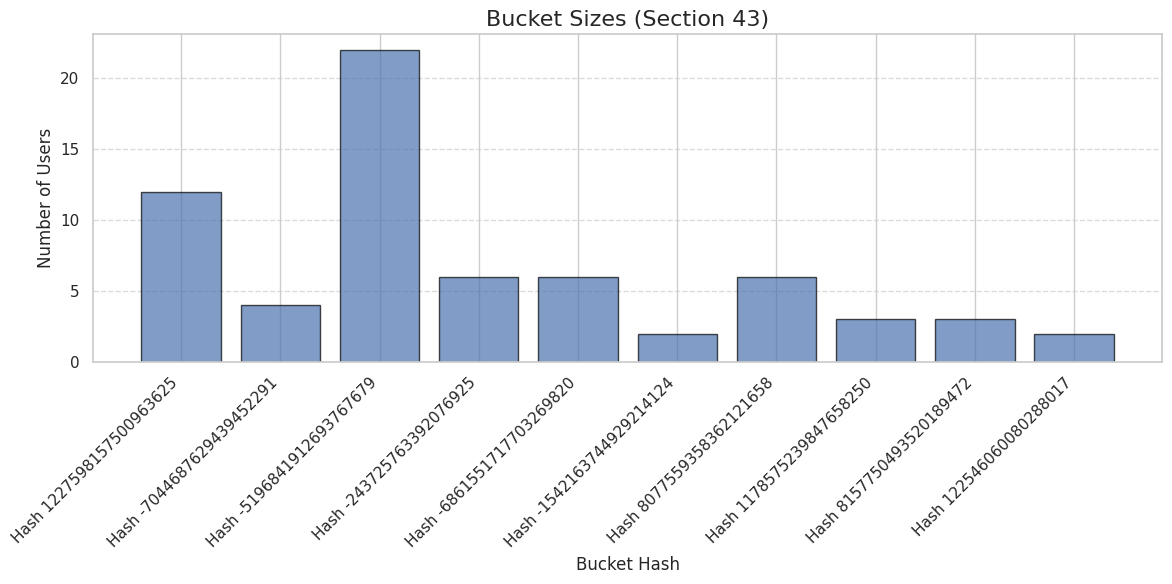

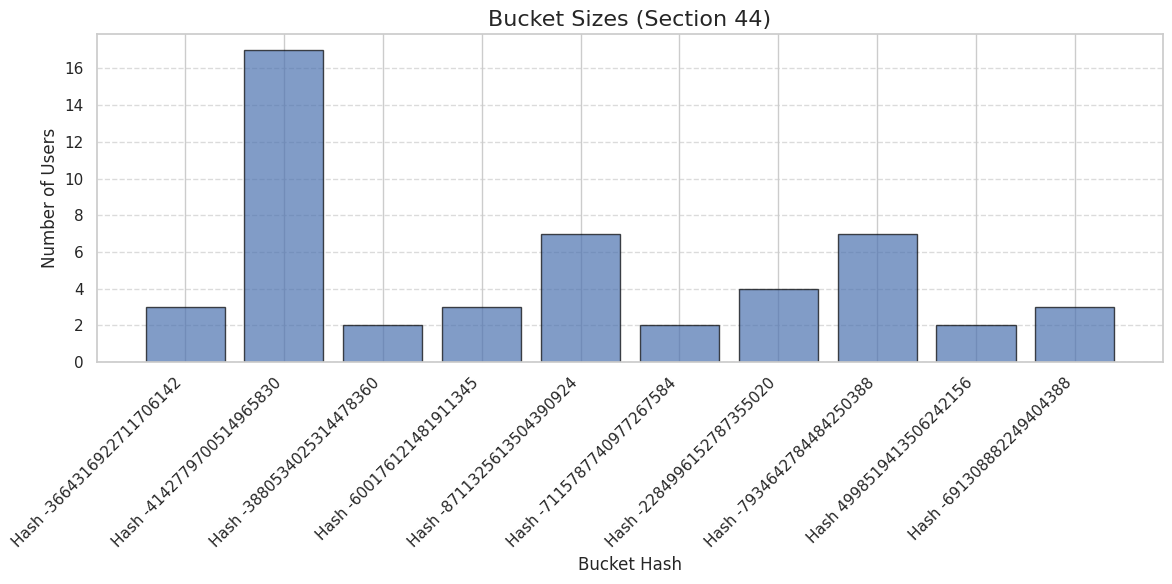

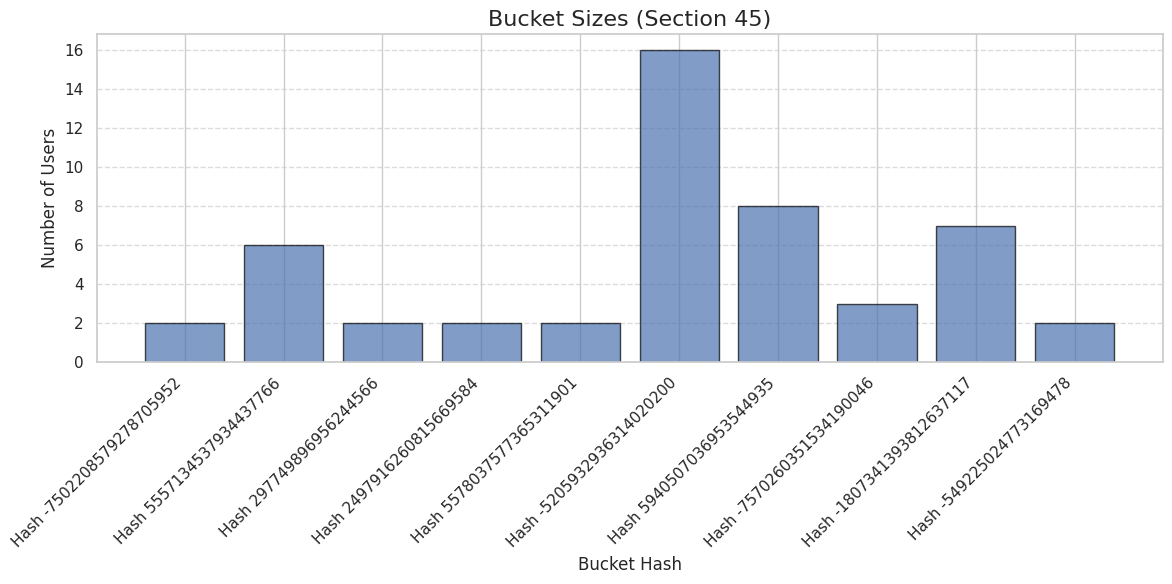

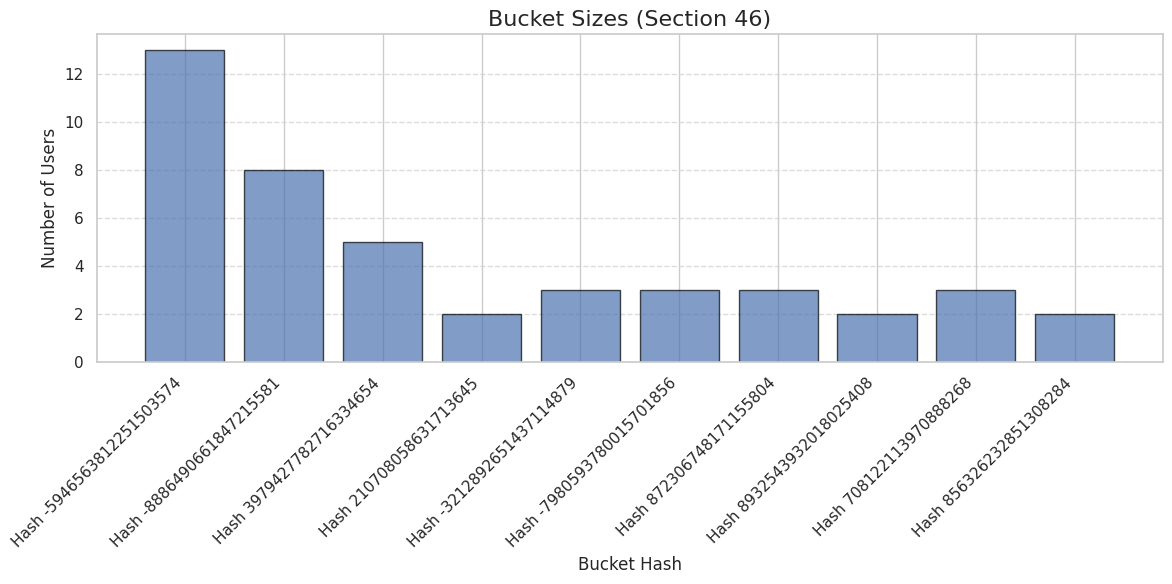

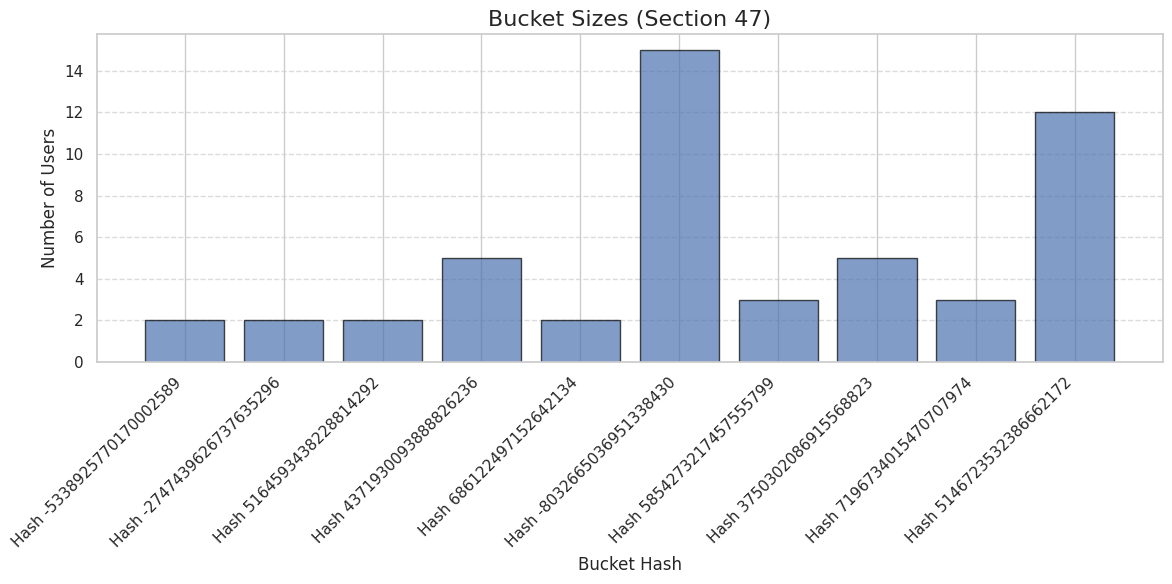

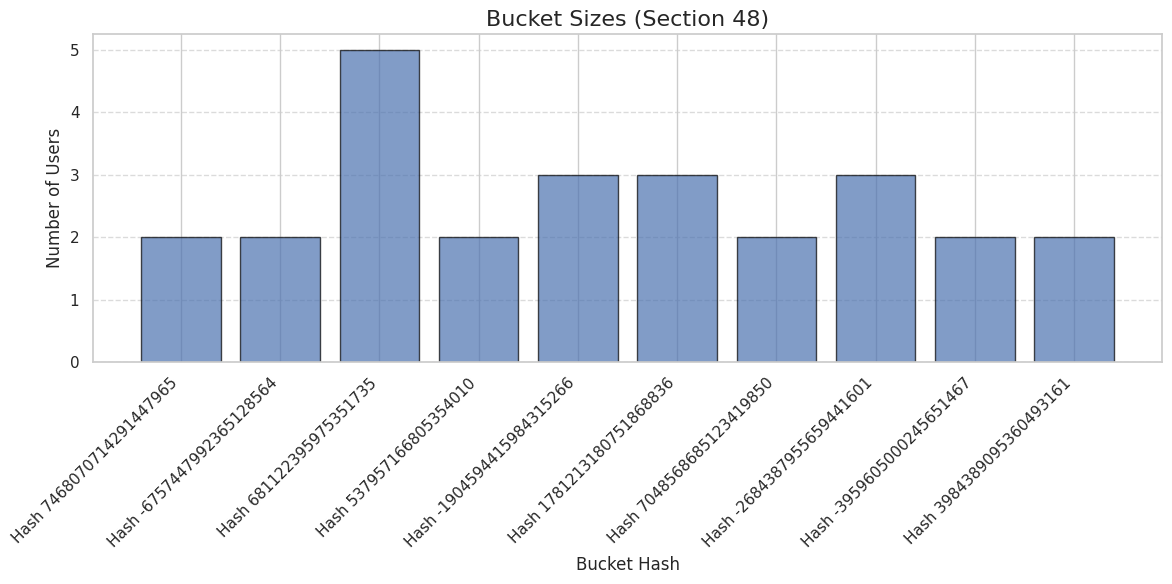

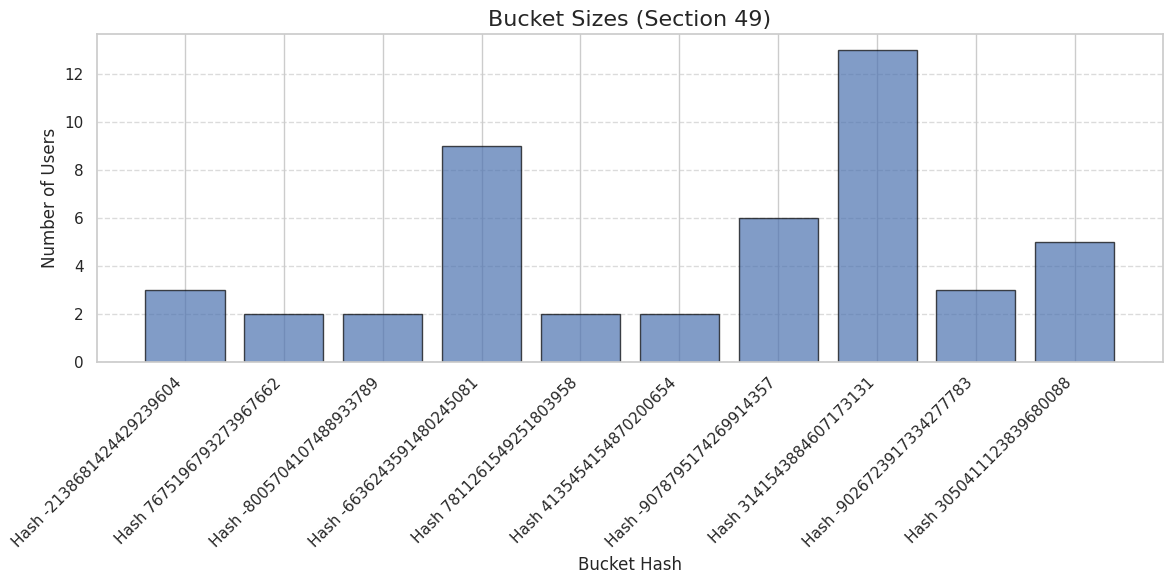

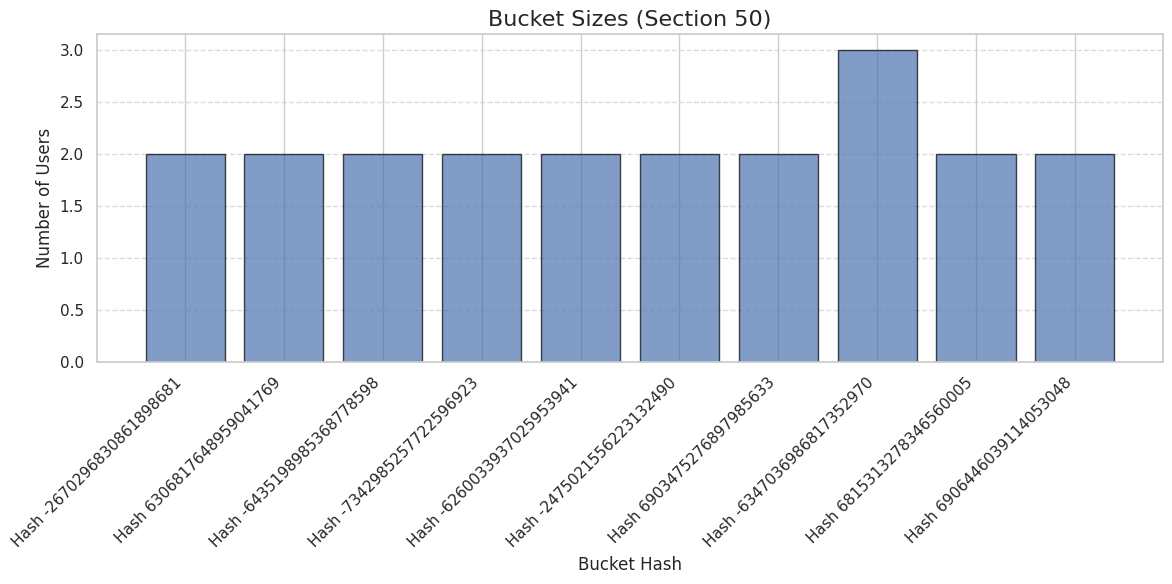

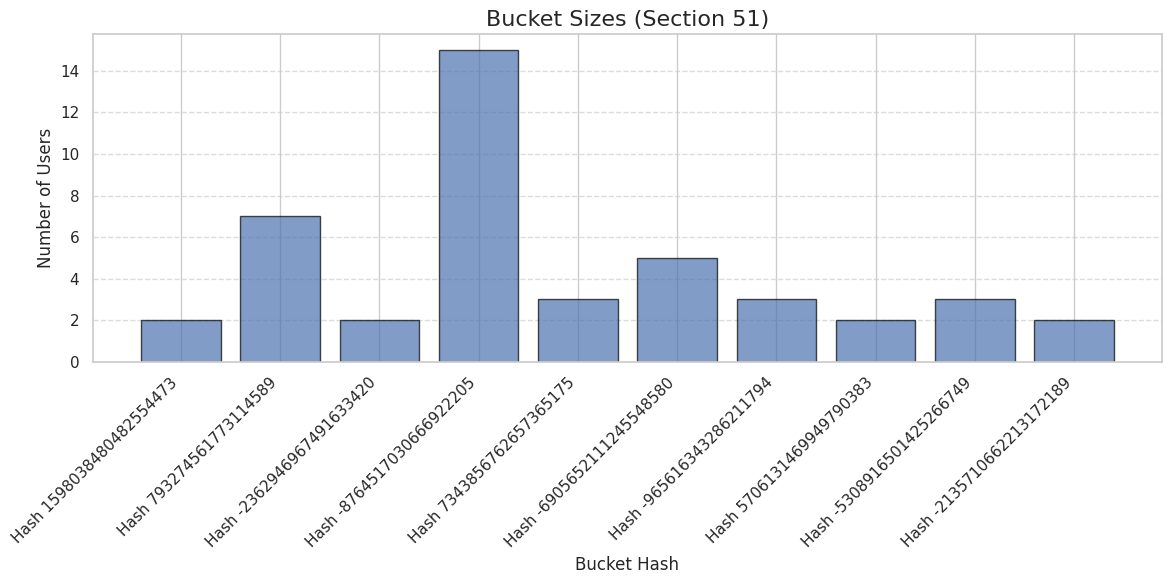

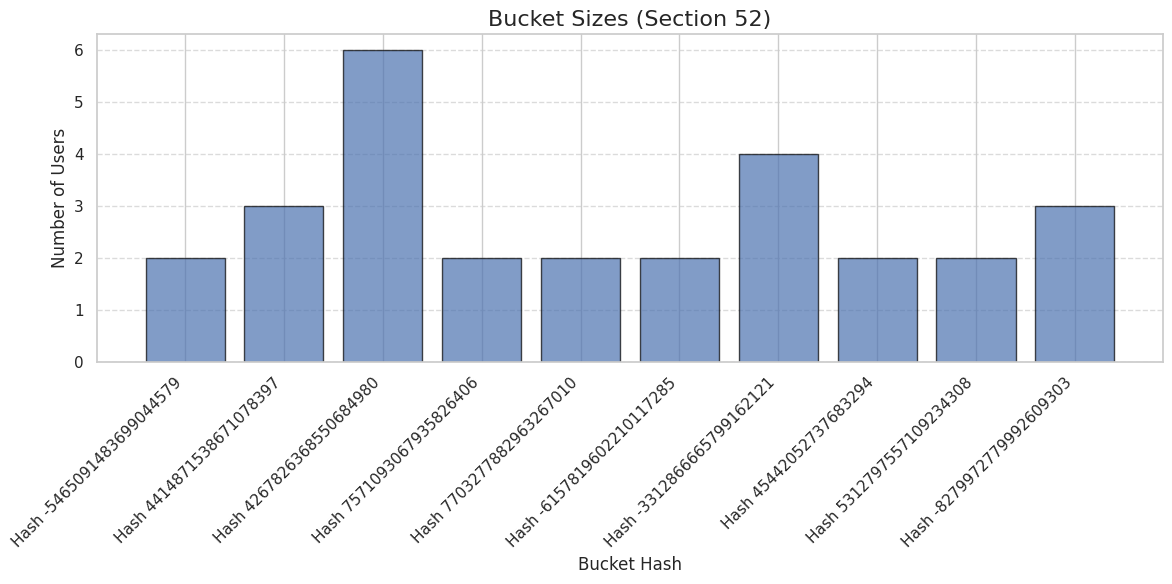

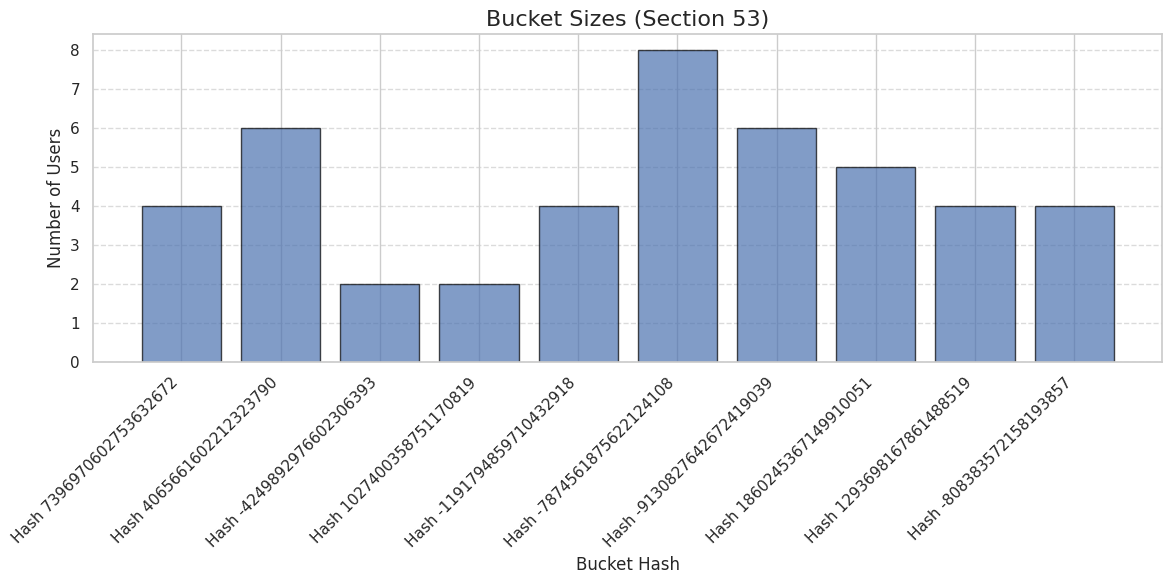

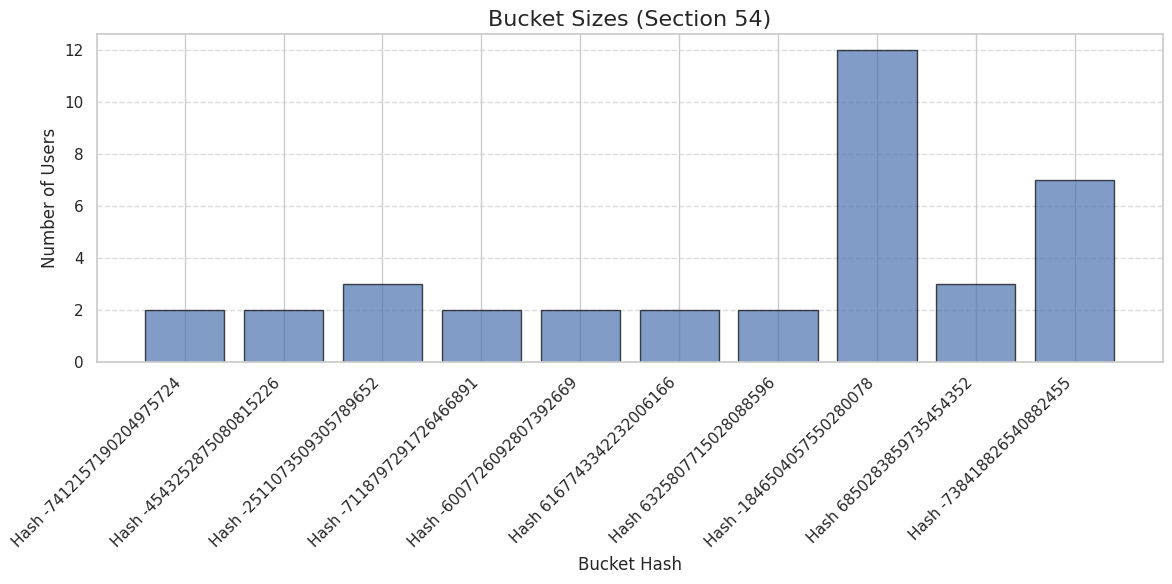

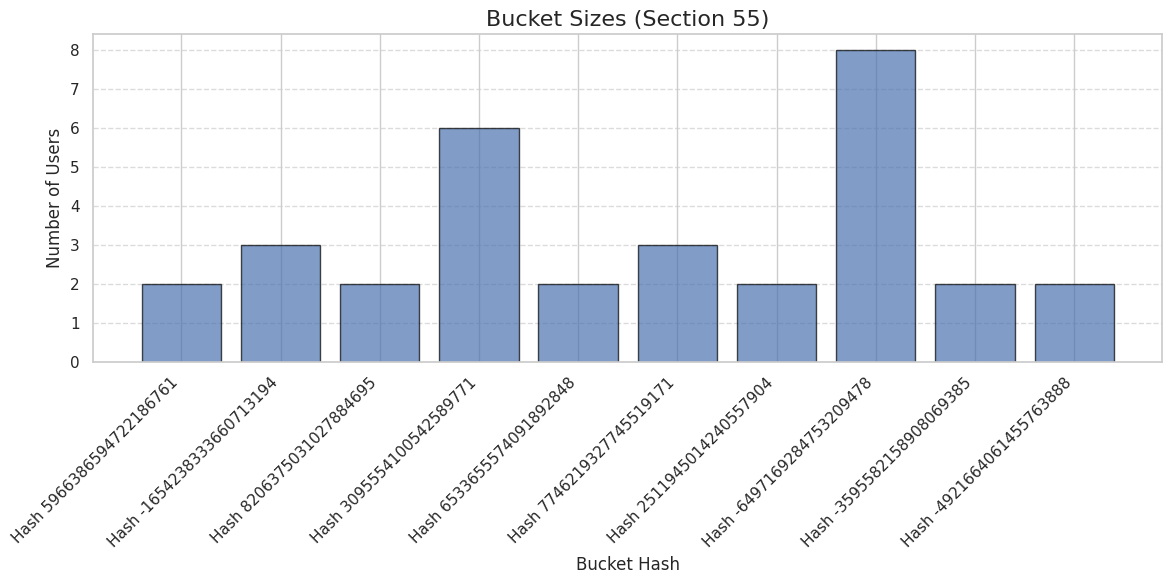

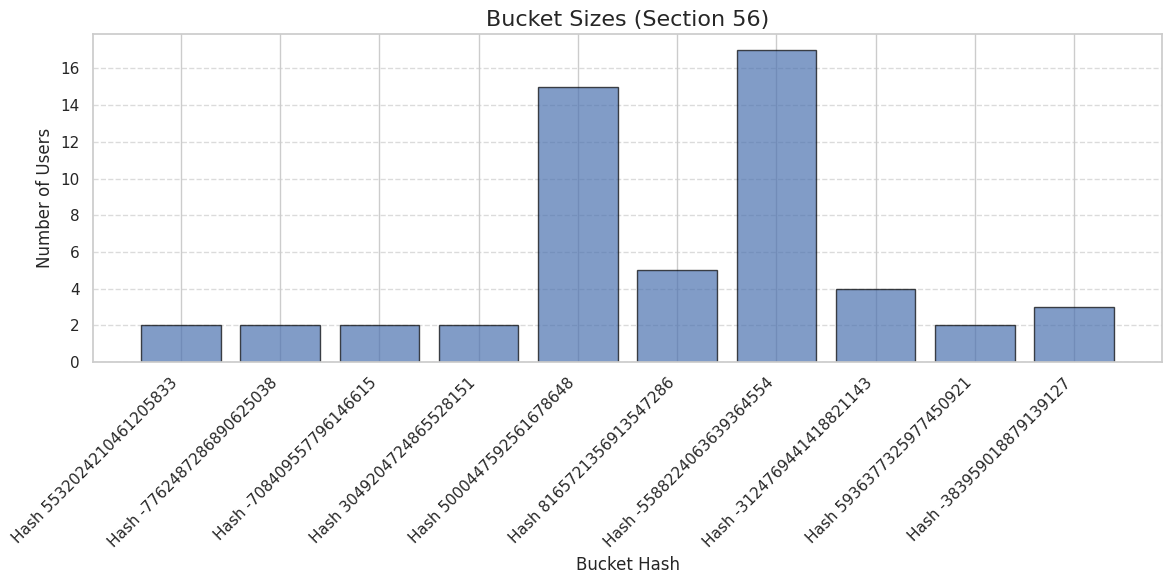

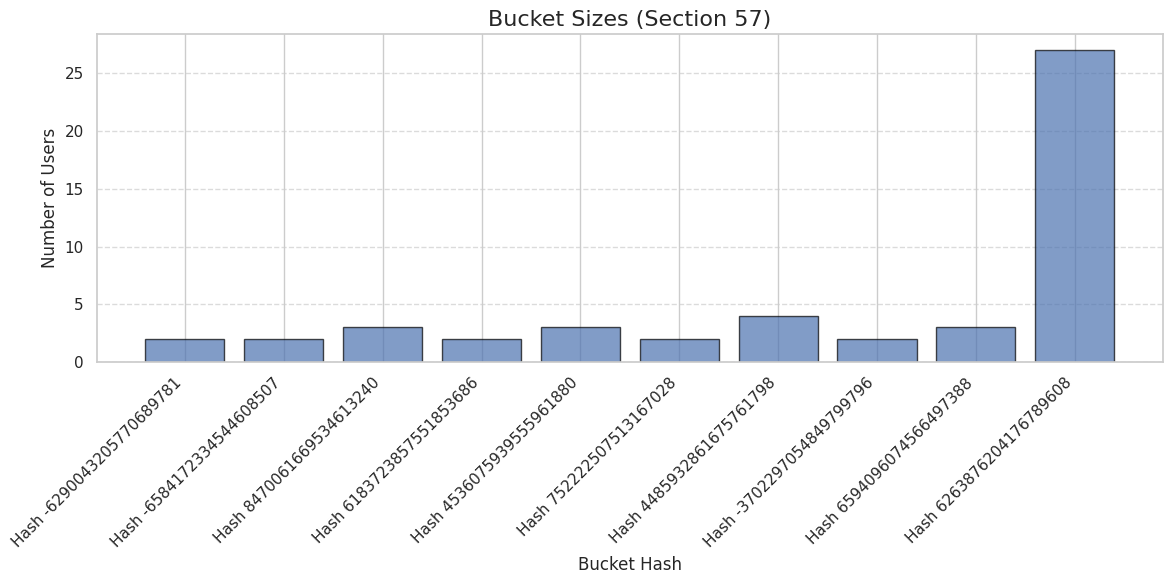

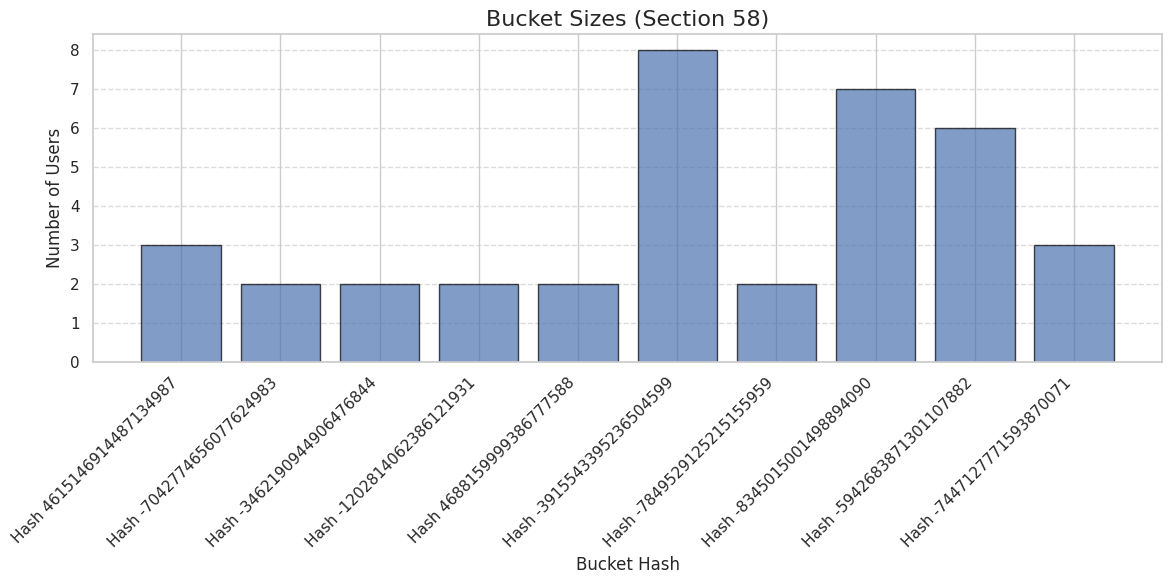

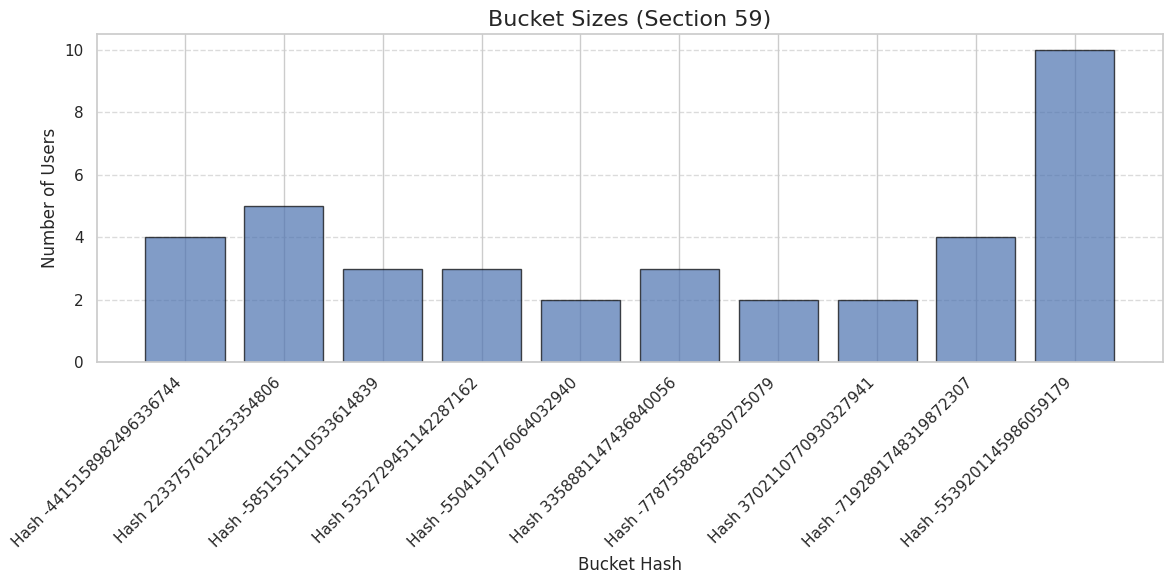

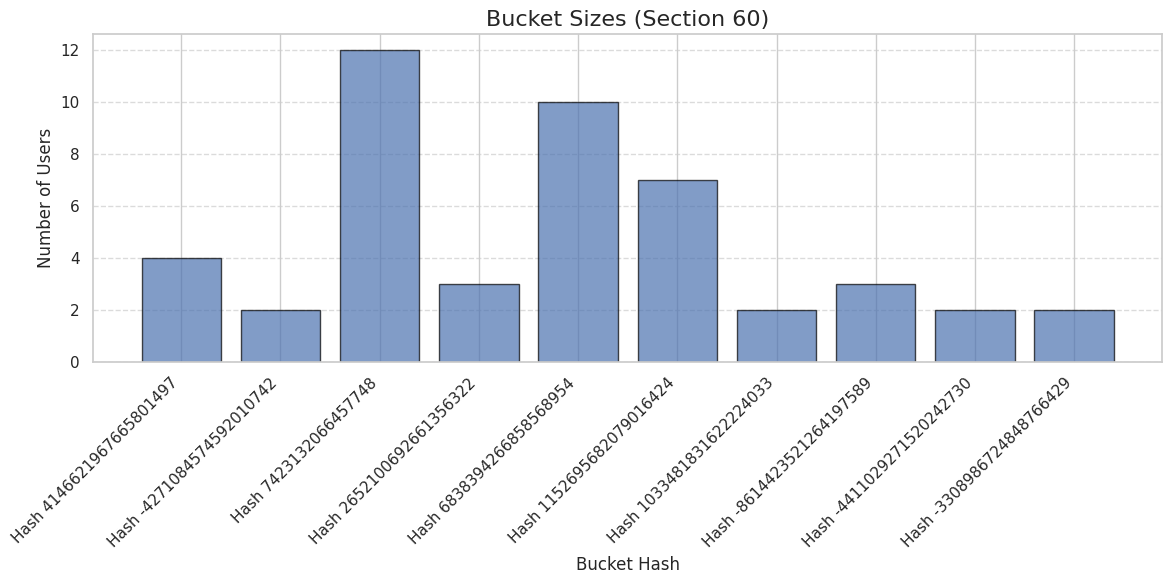

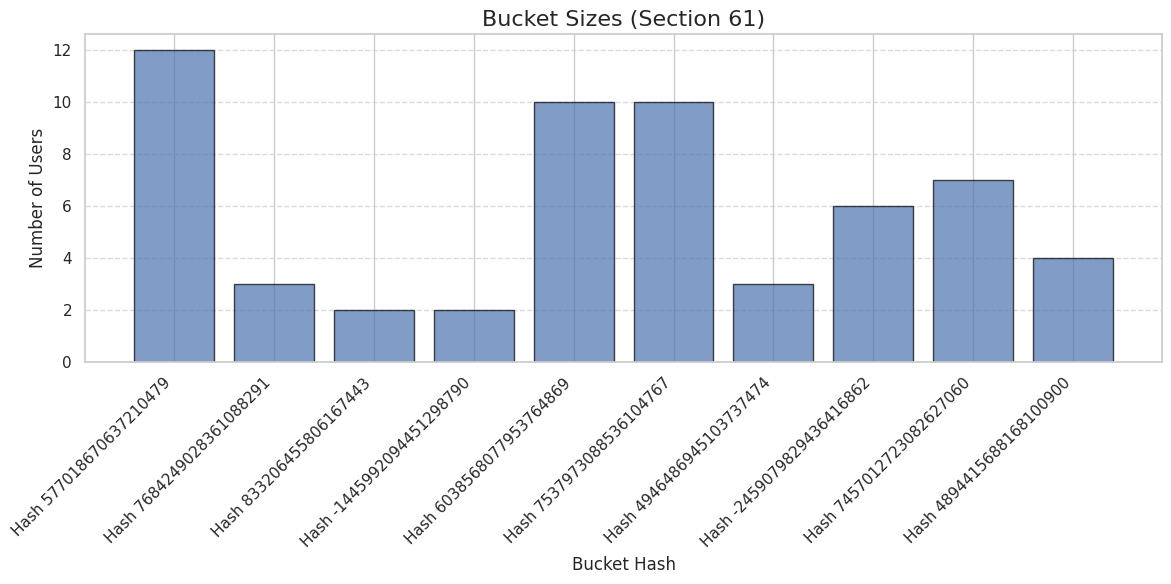

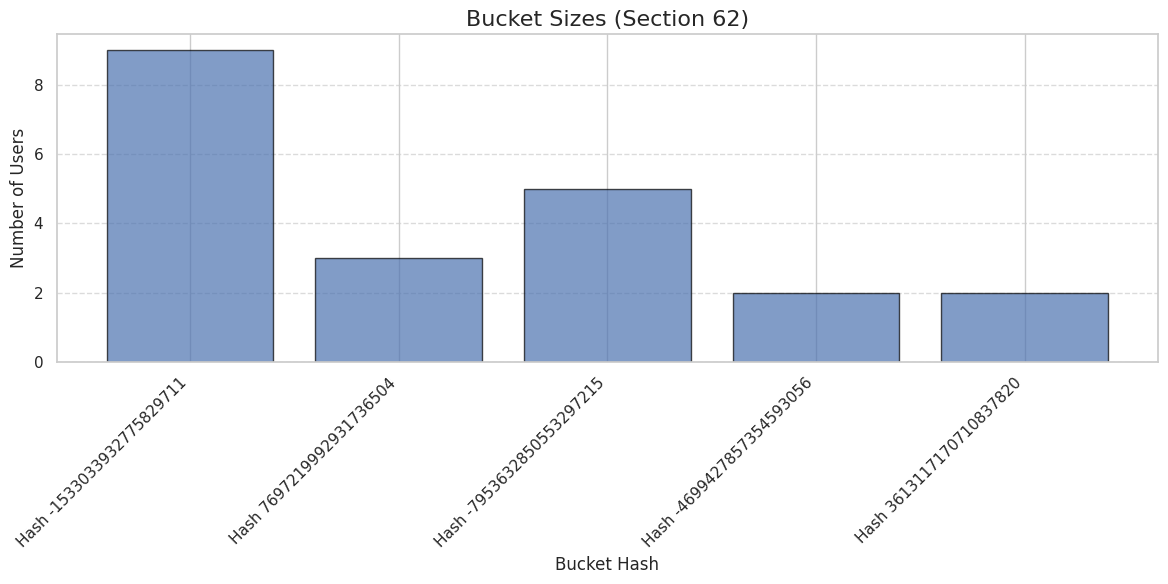

In [ ]:
plot_buckets(buckets)


In [57]:
user = 5
similar_users = find_similar_users(
    user=user,
    buckets=buckets,
    user_movie_dict=user_movies,
    minhash_signatures=None,
    num_bands=None,
    rows_per_band=None
)

print("Analyzing user:", user)

print("Similar Users:", similar_users)


Analyzing user: 5
Similar Users: [75, 48]


In [59]:
rating_dict = create_rating_dict(user_movies)
print(list(rating_dict.items())[:5])

[(1, {2: 3.5, 29: 3.5, 32: 3.5, 47: 3.5, 50: 3.5, 112: 3.5, 151: 4.0, 223: 4.0, 253: 4.0, 260: 4.0, 293: 4.0, 296: 4.0, 318: 4.0, 337: 3.5, 367: 3.5, 541: 4.0, 589: 3.5, 593: 3.5, 653: 3.0, 919: 3.5, 924: 3.5, 1009: 3.5, 1036: 4.0, 1079: 4.0, 1080: 3.5, 1089: 3.5, 1090: 4.0, 1097: 4.0, 1136: 3.5, 1193: 3.5, 1196: 4.5, 1198: 4.5, 1200: 4.0, 1201: 3.0, 1208: 3.5, 1214: 4.0, 1215: 4.0, 1217: 3.5, 1219: 4.0, 1222: 3.5, 1240: 4.0, 1243: 3.0, 1246: 3.5, 1249: 4.0, 1258: 4.0, 1259: 4.0, 1261: 3.5, 1262: 3.5, 1266: 4.0, 1278: 4.0, 1291: 3.5, 1304: 3.0, 1321: 4.0, 1333: 4.0, 1348: 3.5, 1350: 3.5, 1358: 4.0, 1370: 3.0, 1374: 4.0, 1387: 4.0, 1525: 3.0, 1584: 3.5, 1750: 3.5, 1848: 3.5, 1920: 3.5, 1967: 4.0, 1994: 3.5, 1997: 3.5, 2021: 4.0, 2100: 4.0, 2118: 4.0, 2138: 4.0, 2140: 4.0, 2143: 4.0, 2173: 4.0, 2174: 4.0, 2193: 4.0, 2194: 3.5, 2253: 3.5, 2288: 4.0, 2291: 4.0, 2542: 4.0, 2628: 4.0, 2644: 3.5, 2648: 3.5, 2664: 3.5, 2683: 3.5, 2692: 3.5, 2716: 3.5, 2761: 3.0, 2762: 4.0, 2804: 3.5, 2872: 4.0

The `recommend_movies` function suggests movies for a user based on the ratings of their two most similar users. It works by:

1. **Identifying Commonly Rated Movies**:
   - Finds movies both similar users have rated and calculates the average rating for each movie.

2. **Fallback to Individual Ratings**:
   - If no common movies exist, it recommends movies rated by the first similar user, excluding movies already watched by the target user.

3. **Sorting and Limiting Recommendations**:
   - Sorts movies by rating (descending) and returns the top `max_recommendations` as a pandas DataFrame with columns `movieId` and `score`.

This function uses collaborative filtering, leveraging user similarities and ratings to provide personalized movie recommendations.

In [61]:
recommendations_df = recommend_movies(user, similar_users, user_movies, rating_dict, max_recommendations=5)
recommendations_df

movieId  score
0      593    5.0
1      318    5.0
2      296    4.0
3      590    4.0
4       62    4.0

In [62]:
movie_id_to_title = movies_df.set_index('movieId')['title'].to_dict() #mapping


In [63]:
recommendations_df['movieTitle'] = recommendations_df['movieId'].map(movie_id_to_title)

print("Recommendations for user:", user)
(recommendations_df[['movieId', 'movieTitle']])


Recommendations for user: 5


movieId                        movieTitle
0      593  Silence of the Lambs, The (1991)
1      318  Shawshank Redemption, The (1994)
2      296               Pulp Fiction (1994)
3      590         Dances with Wolves (1990)
4       62         Mr. Holland's Opus (1995)

In [65]:
watched_titles = [movie_id_to_title.get(movie, f"Unknown ({movie})") for movie in user_movies[5]]
print("Movies Watched by User 5:", watched_titles)


Movies Watched by User 5: ['Jumanji (1995)', 'Remains of the Day, The (1993)', 'Star Wars: Episode IV - A New Hope (1977)', 'Mary Poppins (1964)', 'Mission: Impossible (1996)', 'American President, The (1995)', 'Up Close and Personal (1996)', 'Birdcage, The (1996)', 'Independence Day (a.k.a. ID4) (1996)', 'Sound of Music, The (1965)', 'Die Hard (1988)', 'Sense and Sensibility (1995)', 'Searching for Bobby Fischer (1993)', 'Secret Garden, The (1993)', 'Nutty Professor, The (1996)', 'That Thing You Do! (1996)', 'Apollo 13 (1995)', 'Nell (1994)', 'Mystery Science Theater 3000: The Movie (1996)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', 'Willy Wonka & the Chocolate Factory (1971)', 'Fish Called Wanda, A (1988)', 'Dave (1993)', "Monty Python's Life of Brian (1979)", 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Stargate (1994)', 'Indian in the Cupboard, The (1995)', 'Shawshank Redemptio

In [66]:
print("Movies watched by User 5:", user_movies[5])

# Confirm no overlap with recommendations
overlap = set(recommendations_df) & user_movies[5]
print("Overlap between recommendations and watched movies:", overlap)


Movies watched by User 5: {2, 515, 260, 1028, 648, 11, 140, 141, 780, 1035, 1036, 17, 529, 531, 788, 1042, 150, 282, 671, 1196, 1198, 1073, 1079, 440, 1080, 1210, 316, 60, 318, 62, 832, 708, 454, 457, 1097, 587, 588, 589, 590, 720, 593, 594, 595, 475, 350, 224, 480, 608, 736, 1291, 104, 235, 364, 491, 110, 367, 368, 508, 370, 1136, 500, 1393, 631, 376, 377, 380}
Overlap between recommendations and watched movies: set()


In [67]:
recommendation_contribution = {}

# Calculate the number of similar users contributing to each movie recommendation
for movie in recommendations_df['movieId']:
    sources = [user for user in similar_users if movie in user_movies[user]]
    recommendation_contribution[movie] = len(sources)

print("\nRecommendation Contributions:")
for movie, count in recommendation_contribution.items():
    movie_title = movie_id_to_title.get(movie, f"Unknown ({movie})")  # Get the movie title or fallback to ID
    print(f"Movie '{movie_title}' is recommended by {count} similar user(s).")



Recommendation Contributions:
Movie 'Silence of the Lambs, The (1991)' is recommended by 2 similar user(s).
Movie 'Shawshank Redemption, The (1994)' is recommended by 2 similar user(s).
Movie 'Pulp Fiction (1994)' is recommended by 2 similar user(s).
Movie 'Dances with Wolves (1990)' is recommended by 2 similar user(s).
Movie 'Mr. Holland's Opus (1995)' is recommended by 2 similar user(s).


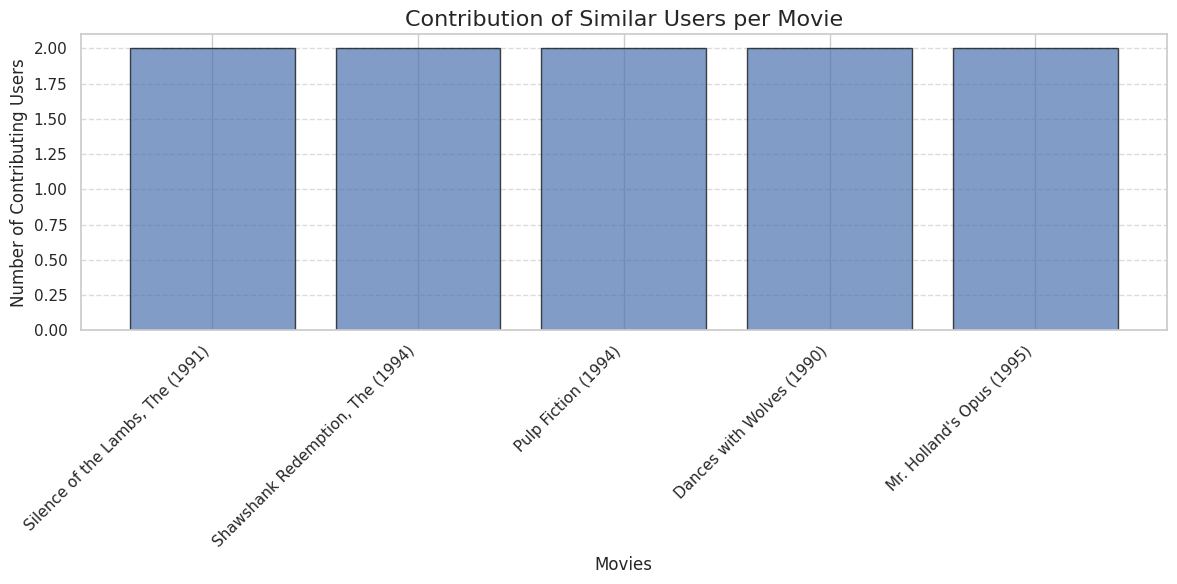

In [68]:
movies = [movie_id_to_title.get(movie, f"Unknown ({movie})") for movie in recommendation_contribution.keys()]
counts = list(recommendation_contribution.values())

# Plot
plt.figure(figsize=(12, 6))
plt.bar(movies, counts, alpha=0.7, edgecolor='black')
plt.title("Contribution of Similar Users per Movie", fontsize=16)
plt.xlabel("Movies", fontsize=12)
plt.ylabel("Number of Contributing Users", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

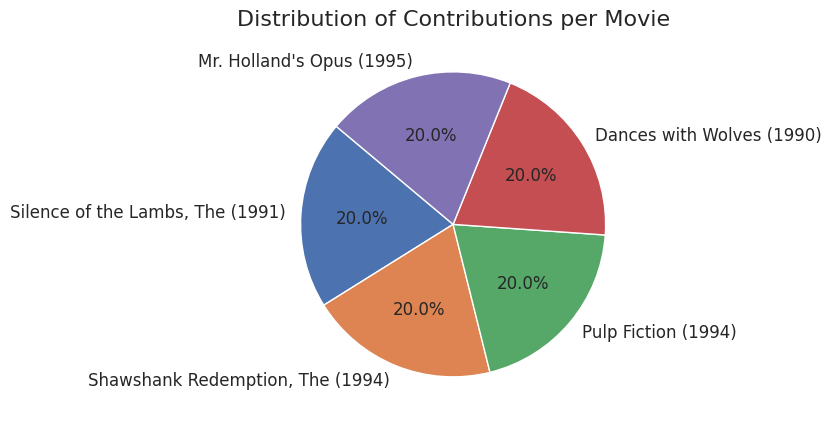

In [69]:
# Plot
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=movies, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title("Distribution of Contributions per Movie", fontsize=16)
plt.tight_layout()
plt.show()


The pie chart shows the **distribution of contributions** across five movies. Key insights:

- *Shawshank Redemption (1994)* has the largest contribution (26.3%), followed by *Silence of the Lambs (1991)* (24.2%).
- *In the Line of Fire (1993)* has the smallest share (8.4%).
- Contributions are mostly balanced, except for the smaller share of *In the Line of Fire*. 

It highlights how resources (e.g., votes or ratings) are allocated among these movies.

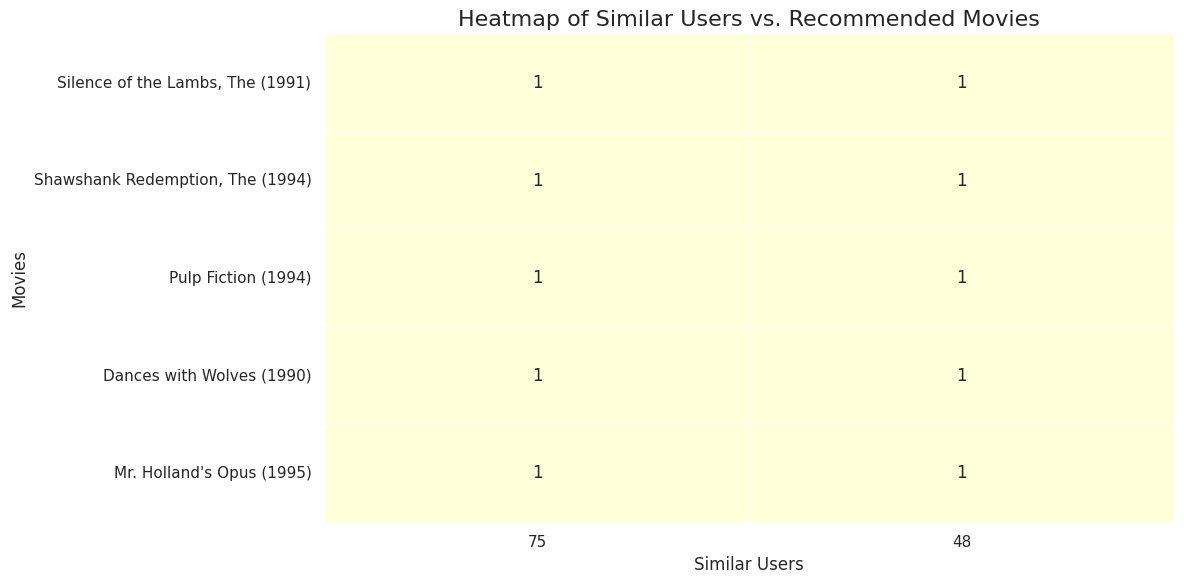

In [74]:
# Data preparation: Create a DataFrame with users contributing to each movie
contribution_data = {
    movie_id_to_title.get(movie, f"Unknown ({movie})"): [
        1 if movie in user_movies[user] else 0 for user in similar_users
    ] for movie in recommendations_df['movieId']
}

contribution_df = pd.DataFrame(contribution_data, index=similar_users)

# Heatmap plot
plt.figure(figsize=(12, 6))
sns.heatmap(contribution_df.T, annot=True, cbar=False, cmap="YlGnBu", fmt='d', linewidths=.5)
plt.title("Heatmap of Similar Users vs. Recommended Movies", fontsize=16)
plt.xlabel("Similar Users", fontsize=12)
plt.ylabel("Movies", fontsize=12)
plt.tight_layout()
plt.show()


This graphs were more usefull if we could use info from all the users in each bucket, I'll leave it cause they may help to visualize the thinking process of the algorithm

The heatmap visualizes interactions between **similar users** (columns) and **movies** (rows). Dark cells represent user interactions (e.g., ratings), while light cells indicate no interaction. It highlights:

- **Popular Movies**: Rows with more dark cells (e.g., *Toy Story (1995)*, *Heat (1995)*) are likely good candidates for recommendations.
- **Less Popular Movies**: Rows with fewer dark cells (e.g., *Sabrina (1995)*) show limited user engagement.
- **Purpose**: Helps identify movies for recommendation based on patterns of interaction among similar users.

In [75]:
similar_user_movies = set()
for user in similar_users:
    similar_user_movies.update(user_movies[user])

print("Movies watched by similar users:", similar_user_movies)

Movies watched by similar users: {3, 516, 515, 6, 10, 1035, 14, 527, 17, 529, 21, 534, 535, 25, 541, 544, 39, 553, 43, 47, 1073, 50, 52, 1077, 1079, 1080, 62, 1089, 1090, 1094, 1097, 586, 589, 590, 1103, 592, 593, 89, 94, 608, 110, 111, 1136, 1150, 648, 1161, 653, 141, 144, 1172, 150, 151, 153, 1183, 161, 165, 1193, 171, 1196, 1197, 1198, 1199, 1200, 1206, 1208, 185, 1210, 1211, 1213, 1214, 708, 1221, 1224, 1225, 204, 720, 1233, 1240, 733, 1246, 223, 736, 1250, 230, 232, 1259, 750, 246, 247, 249, 252, 257, 260, 265, 780, 272, 786, 276, 788, 280, 800, 292, 296, 307, 316, 318, 319, 830, 326, 329, 852, 858, 349, 350, 356, 357, 369, 373, 377, 380, 919, 923, 412, 924, 417, 428, 431, 434, 452, 454, 457, 468, 474, 475, 480, 497, 500, 509}


In [76]:
similar_user_movies_titles = [movie_id_to_title.get(movie, f"Unknown ({movie})") for movie in similar_user_movies]
print("Movies watched by similar users:", similar_user_movies_titles)


Movies watched by similar users: ['Grumpier Old Men (1995)', 'Renaissance Man (1994)', 'Remains of the Day, The (1993)', 'Heat (1995)', 'GoldenEye (1995)', 'Sound of Music, The (1965)', 'Nixon (1995)', "Schindler's List (1993)", 'Sense and Sensibility (1995)', 'Searching for Bobby Fischer (1993)', 'Get Shorty (1995)', 'Shadowlands (1993)', 'Short Cuts (1993)', 'Leaving Las Vegas (1995)', 'Blade Runner (1982)', 'Striking Distance (1993)', 'Clueless (1995)', 'Tombstone (1993)', 'Restoration (1995)', 'Seven (a.k.a. Se7en) (1995)', 'Willy Wonka & the Chocolate Factory (1971)', 'Usual Suspects, The (1995)', 'Mighty Aphrodite (1995)', 'Sleeper (1973)', 'Fish Called Wanda, A (1988)', "Monty Python's Life of Brian (1979)", "Mr. Holland's Opus (1995)", 'Reservoir Dogs (1992)', 'Platoon (1986)', 'Crying Game, The (1992)', 'E.T. the Extra-Terrestrial (1982)', 'Home Alone (1990)', 'Terminator 2: Judgment Day (1991)', 'Dances with Wolves (1990)', 'Rebel Without a Cause (1955)', 'Batman (1989)', 'Si

In [77]:
overlap_with_target = similar_user_movies & user_movies[5]
print("Overlap with User 5's watched movies:", overlap_with_target)

Overlap with User 5's watched movies: {515, 260, 648, 1035, 780, 141, 17, 529, 788, 150, 1196, 1198, 1073, 1079, 1080, 1210, 316, 62, 318, 708, 454, 457, 1097, 589, 590, 720, 593, 475, 350, 480, 608, 736, 110, 1136, 500, 377, 380}


In [78]:
overlap_titles = [movie_id_to_title.get(movie, f"Unknown ({movie})") for movie in overlap_with_target]
print("Overlap Titles:", overlap_titles)


Overlap Titles: ['Remains of the Day, The (1993)', 'Star Wars: Episode IV - A New Hope (1977)', 'Mission: Impossible (1996)', 'Sound of Music, The (1965)', 'Independence Day (a.k.a. ID4) (1996)', 'Birdcage, The (1996)', 'Sense and Sensibility (1995)', 'Searching for Bobby Fischer (1993)', 'Nutty Professor, The (1996)', 'Apollo 13 (1995)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', 'Willy Wonka & the Chocolate Factory (1971)', 'Fish Called Wanda, A (1988)', "Monty Python's Life of Brian (1979)", 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Stargate (1994)', "Mr. Holland's Opus (1995)", 'Shawshank Redemption, The (1994)', 'Truth About Cats & Dogs, The (1996)', 'Firm, The (1993)', 'Fugitive, The (1993)', 'E.T. the Extra-Terrestrial (1982)', 'Terminator 2: Judgment Day (1991)', 'Dances with Wolves (1990)', 'Wallace & Gromit: The Best of Aardman Animation (1996)', 'Silence of the Lambs, 

In [79]:
movie_popularity = {}
for user, movies in user_movies.items():
    for movie in movies:
        movie_popularity[movie] = movie_popularity.get(movie, 0) + 1

for movie in recommendations_df['movieId']:
    print(f"Movie {movie} is watched by {movie_popularity.get(movie, 0)} user(s) in total.")


Movie 593 is watched by 63299 user(s) in total.
Movie 318 is watched by 63366 user(s) in total.
Movie 296 is watched by 67310 user(s) in total.
Movie 590 is watched by 44208 user(s) in total.
Movie 62 is watched by 19381 user(s) in total.
